# INFLUENCIA DE LAS PRECIPITACIONES Y EL VIENTO EN LA CONTAMINACIÓN

## 1. Introducción

La comunidad de Madrid ha estado incumpliendo durante años los niveles establecidos por los parámetros de la calidad del aire. 
Hasta la fecha existen pocos datos sobre como influye la meteorologia en relacion a la contaminacion. 
Las teorias actuales sugieren que las emisiones contaminantes de los vehiculos son la causa principal, 
reduciendo o limitando la circulacion de los mismos.Una de las medidas que el Ayuntamiento de Madrid tomo dentro
de su plan de calidad del aire es la aplicación de restricciones de tráfico de paso al centro de la capital(Madrid central).

La contaminacion supone un problema grave para la salud, según la Organización Mundial de la Salud (OMS) "la contaminación atmosférica urbana aumenta el riesgo de padecer enfermedades respiratorias agudas, como la neumonía y crónicas, como el cáncer del pulmón y las enfermedades cardiovasculares".

Nuestro objetivo en el presente trabajo es comprobar si otras causas como la meteorologia pueden influir en la calidad del aire en la ciudad de Madrid.


## 2. Objetivos

### 2.1 Hipótesis

La contaminación en la comunidad de Madrid se ve reducida cuando aumenta el nivel de precipitaciones y la velocidad del viento. 


### 2.2 Restricciones

- La precisión del estudio es a nivel diario ya que no hay disponibles fuentes de datos para la precipitación a nivel horario.

- Unicamente se estudia la relación de la precipitación y velocidad del viento con la contaminación atmosférica 
  y no se incluyen otros tipos como la contaminaciñon, acústica, lumínica...

### 2.3 Alcance

- El estudio se centra en la ciudad de Madrid (España)

## 3. Metodología

### 3.1 Explicación de la metodología

<p style="text-align: justify;">
La metodología elegida es SEMMA, es  el  acrónimo  a  las  cinco  fases:  (Sample,  Explore,  Modify, Model, Assess). A continuación se explica cada uno de las fases:   
**Sample**: Se toma una muestra de los datos y se crea con ellos un dataset (más) reducido. Las muestras deben ser lo suficientemente grandes como para contener toda la información significativa pero también lo suficientemente pequeñas como para poder procesarlas rápidamente.  
**Explore**: Se analizan (exploran) los datos para comprenderlos, buscando relaciones previstas, tendencias imprevistas y/o anomalías, así como ideas para su posterior procesamiento.  
**Modify**: Se modifican los datos (creando, seleccionando y transformando las variables adecuadas) para facilitar el proceso siguiente (modelización).  
**Model**: Se entrenan y aplican distintos modelos para el procesamiento de los datos, seleccionando aquel cuya tecnología y/o parámetros produce unos resultados aparentemente más adecuados.  
**Assess**: Se evalúan los resultados del proceso de minería de datos, midiendo su utilidad y fiabilidad.  
</p>

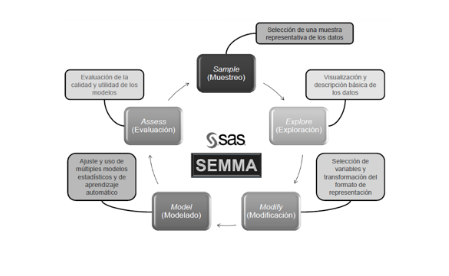

## 3.2 Planificación

A continuación se visualiza la planificación llevada a cabo por los integrantes del proyecto con un Diagrama de Gantt:
  
[>>Enlace al Diagrama Gant<<](https://drive.google.com/file/d/192o2H7ss1-ZGJ13-0Reet4vwuaRe5dlM/view)

## 4. Implementación

Durante la elaboración de este estudio se utilizará la metodología SEMMA (Sample,  Explore,  Modify, Model, Assess),en cada una de las fases se irá explicando los pasos realizados.

En la fase **Sample** se tomará muestra de los datos y se creará un dataset más reducido.  
En la fase **Explore** se visualizarán los datos para la comprensión de los mismos.  
En la fase **Modify** se modifican los datos con el objetivo de prepararlos para la modelización. Para este estudio encontramos dos vertientes, por una se estudiará como afecta la precipitación a la contaminación del día siguiente, y por otra parte como afecta la precipitación mensual al mes siguiente.  
En la fase **Model** se aplicará Árbol de decisiones como modelo seleccionado para el estudio.  
En la fase **Assess** se procederá a la evaluación de los resultados obtenidos en el modelo.  

Como paso previo al estudio, se realizará la carga de paquetes y librerías necesarias para el mismo.


### Instalamos Paquetes y cargamos librerias

In [114]:
#Limpiamos memoria
rm(list=ls());
is.installed <- function(mypkg) {
  is.element(mypkg, installed.packages()[,1]) 
}

#Instalamos paquetes para agrupar csv
if (!is.installed("data.table")){
  install.packages("data.table",repos = "http://cran.us.r-project.org")
};
#Intslamos paquete para manipular ts
if (!is.installed("xts")){
  install.packages("xts",repos = "http://cran.us.r-project.org")
};
#Instalamos paquete para agrupar datos
if (!is.installed("dplyr")){
  install.packages("dplyr",repos = "http://cran.us.r-project.org")
};
# Instalamos paquete para leer exccels
if (!is.installed("readxl")){
  install.packages("readxl",repos = "http://cran.us.r-project.org")
};
#Instalamos paquetes para modelo predictivo de arbol
if (!is.installed("party")){
  install.packages("party",repos = "http://cran.us.r-project.org")
};
if (!is.installed("rpart")){
  install.packages("rpart",repos = "http://cran.us.r-project.org")
};
if (!is.installed("randomForest")){
  install.packages("randomForest",repos = "http://cran.us.r-project.org")
};
if (!is.installed("rpart.plot")){
  install.packages("rpart.plot",repos = "http://cran.us.r-project.org")
};
if (!is.installed("rattle")){
  install.packages("rattle",repos = "http://cran.us.r-project.org")
};
if (!is.installed("RColorBrewer")){
  install.packages("RColorBrewer",repos = "http://cran.us.r-project.org")
};
if (!is.installed("tidyr")){
  install.packages("tidyr",repos = "http://cran.us.r-project.org")
};
if (!is.installed("corrplot")){
  install.packages("corrplot",repos = "http://cran.us.r-project.org")
};

In [115]:
# Cargamos las librerias
library(data.table)
library(xts)
library(dplyr)    # loads %>%
library(readxl)
library(ggplot2)
library(party)
library(rpart)
library(randomForest)
library(rpart.plot)
library(rattle)
library(RColorBrewer)
library(tidyr)
library(corrplot)

## 1º FASE: Sample

<p style="text-align: justify;">
Se toma una muestra de los datos y se crea con ellos un dataset (más) reducido. Las muestras deben ser lo suficientemente grandes como para contener toda la información significativa pero también lo suficientemente pequeñas como para poder procesarlas rápidamente.
</p>

### Cargamos datos calidad del aire 2001-2018 Madrid

Cargamos las mediciones de los contaminantes de Madrid entre 2001-2018 y creamos un dataframe con todas ellas

In [116]:
#Cargamos los datos de los anos en un dataset (utilziamos read.csv ya que el separador es,)

data2001<- read.csv(file = "data/madrid_2001.csv",header = TRUE);
data2002<- read.csv(file = "data/madrid_2002.csv",header = TRUE);
data2003<- read.csv(file = "data/madrid_2003.csv",header = TRUE);
data2004<- read.csv(file = "data/madrid_2004.csv",header = TRUE);
data2005<- read.csv(file = "data/madrid_2005.csv",header = TRUE);
data2006<- read.csv(file = "data/madrid_2006.csv",header = TRUE);
data2007<- read.csv(file = "data/madrid_2007.csv",header = TRUE);
data2008<- read.csv(file = "data/madrid_2008.csv",header = TRUE);
data2009<- read.csv(file = "data/madrid_2009.csv",header = TRUE);
data2010<- read.csv(file = "data/madrid_2010.csv",header = TRUE);
data2011<- read.csv(file = "data/madrid_2011.csv",header = TRUE);
data2012<- read.csv(file = "data/madrid_2012.csv",header = TRUE);
data2013<- read.csv(file = "data/madrid_2013.csv",header = TRUE);
data2014<- read.csv(file = "data/madrid_2014.csv",header = TRUE);
data2015<- read.csv(file = "data/madrid_2015.csv",header = TRUE);
data2016<- read.csv(file = "data/madrid_2016.csv",header = TRUE);
data2017<- read.csv(file = "data/madrid_2017.csv",header = TRUE);
data2018<- read.csv(file = "data/madrid_2018.csv",header = TRUE);

In [117]:
# unimos los datos 
data <- data.table::rbindlist(list(data2001,data2002,data2003,data2004,data2005,data2006,
                                   data2007,data2008,data2009,data2010,data2011,data2012,
                                   data2013,data2014,data2015,data2016,data2017,data2018),
                                   fill = TRUE);

# convertimos la lista en un dataset
airMadrid <- as.data.frame(data); 

# liberamos memoria
rm(list=ls(pattern="data"))

###  Carga datos Precipitaciones 2001-2018

Cargamos las mediciones de las precipitaciones de Madrid entre 2001-2018 y creamos un dataframe con ellas

In [118]:
#Cargamos los datos de las precipitaciones
rainfall_2001<- readxl::read_xlsx("data/rainfall_2001.xlsx",col_names = TRUE);
rainfall_2002<- readxl::read_xlsx("data/rainfall_2002.xlsx",col_names = TRUE);
rainfall_2003<- readxl::read_xlsx("data/rainfall_2003.xlsx",col_names = TRUE);
rainfall_2004<- readxl::read_xlsx("data/rainfall_2004.xlsx",col_names = TRUE);
rainfall_2005<- readxl::read_xlsx("data/rainfall_2005.xlsx",col_names = TRUE);
rainfall_2006<- readxl::read_xlsx("data/rainfall_2006.xlsx",col_names = TRUE);
rainfall_2007<- readxl::read_xlsx("data/rainfall_2007.xlsx",col_names = TRUE);
rainfall_2008<- readxl::read_xlsx("data/rainfall_2008.xlsx",col_names = TRUE);
rainfall_2009<- readxl::read_xlsx("data/rainfall_2009.xlsx",col_names = TRUE);
rainfall_2010<- readxl::read_xlsx("data/rainfall_2010.xlsx",col_names = TRUE);
rainfall_2011<- readxl::read_xlsx("data/rainfall_2011.xlsx",col_names = TRUE);
rainfall_2012<- readxl::read_xlsx("data/rainfall_2012.xlsx",col_names = TRUE);
rainfall_2013<- readxl::read_xlsx("data/rainfall_2013.xlsx",col_names = TRUE);
rainfall_2014<- readxl::read_xlsx("data/rainfall_2014.xlsx",col_names = TRUE);
rainfall_2015<- readxl::read_xlsx("data/rainfall_2015.xlsx",col_names = TRUE);
rainfall_2016<- readxl::read_xlsx("data/rainfall_2016.xlsx",col_names = TRUE);
rainfall_2017<- readxl::read_xlsx("data/rainfall_2017.xlsx",col_names = TRUE);
rainfall_2018<- readxl::read_xlsx("data/rainfall_2018.xlsx",col_names = TRUE);

In [119]:
# unimos los datos
rainfall <- data.table::rbindlist(list(rainfall_2001,rainfall_2002,rainfall_2003,rainfall_2004,
              rainfall_2005,rainfall_2006,rainfall_2007,rainfall_2008,rainfall_2009,rainfall_2010,
              rainfall_2011,rainfall_2012,rainfall_2013,rainfall_2014,rainfall_2015,rainfall_2016,
rainfall_2017,rainfall_2018), fill = TRUE)

# convertimos la lista en un dataset
dataFrameRainfall <- as.data.frame(rainfall);

# liberamos memoria
rm(list=ls(pattern="rainfall"))



### Carga datos Viento 2001-2018

Cargamos  las mediciones del viento de Madrid entre 2001-2018 y creamos un dataframe con ellas

In [120]:
#Cargamos los datos de las precipitaciones
wind_2001<- readxl::read_xlsx("data/wind_2001.xlsx",col_names = TRUE);
wind_2002<- readxl::read_xlsx("data/wind_2002.xlsx",col_names = TRUE);
wind_2003<- readxl::read_xlsx("data/wind_2003.xlsx",col_names = TRUE);
wind_2004<- readxl::read_xlsx("data/wind_2004.xlsx",col_names = TRUE);
wind_2005<- readxl::read_xlsx("data/wind_2005.xlsx",col_names = TRUE);
wind_2006<- readxl::read_xlsx("data/wind_2006.xlsx",col_names = TRUE);
wind_2007<- readxl::read_xlsx("data/wind_2007.xlsx",col_names = TRUE);
wind_2008<- readxl::read_xlsx("data/wind_2008.xlsx",col_names = TRUE);
wind_2009<- readxl::read_xlsx("data/wind_2009.xlsx",col_names = TRUE);
wind_2010<- readxl::read_xlsx("data/wind_2010.xlsx",col_names = TRUE);
wind_2011<- readxl::read_xlsx("data/wind_2011.xlsx",col_names = TRUE);
wind_2012<- readxl::read_xlsx("data/wind_2012.xlsx",col_names = TRUE);
wind_2013<- readxl::read_xlsx("data/wind_2013.xlsx",col_names = TRUE);
wind_2014<- readxl::read_xlsx("data/wind_2014.xlsx",col_names = TRUE);
wind_2015<- readxl::read_xlsx("data/wind_2015.xlsx",col_names = TRUE);
wind_2016<- readxl::read_xlsx("data/wind_2016.xlsx",col_names = TRUE);
wind_2017<- readxl::read_xlsx("data/wind_2017.xlsx",col_names = TRUE);
wind_2018<- readxl::read_xlsx("data/wind_2018.xlsx",col_names = TRUE);

In [121]:
wind <- data.table::rbindlist(list(wind_2001,wind_2002,wind_2003,wind_2004,
              wind_2005,wind_2006,wind_2007,wind_2008,wind_2009,wind_2010,
              wind_2011,wind_2012,wind_2013,wind_2014,wind_2015,wind_2016,
wind_2017,wind_2018), fill = TRUE)

dataFrameWind <- as.data.frame(wind);

rm(list=ls(pattern="wind"))

wind <-dataFrameWind
rm(dataFrameWind)

## 2º FASE: Explore

Se analizan (exploran) los datos para comprenderlos, buscando relaciones previstas, tendencias imprevistas y/o anomalías, así como ideas para su posterior procesamiento.

Para cada uno de los dataframe creados se visualizará el principo y el final de los mismas para observar si el intervalo en el que se encuentran abarca 2001-2018

### Visualizacion inicial datos calidad del aire

In [122]:
head(airMadrid)
tail(airMadrid)

date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
2001-08-01 01:00:00,NA,0.37,NA,NA,NA,58.40,87.15,NA,34.53,105.00,NA,6.34,NA,NA,28079001,NA,NA,NA
2001-08-01 01:00:00,1.50,0.34,1.49,4.10,0.07,56.25,75.17,2.11,42.16,100.60,1.73,8.11,1.24,10.82,28079035,NA,NA,NA
2001-08-01 01:00:00,NA,0.28,NA,NA,NA,50.66,61.38,NA,46.31,100.10,NA,7.85,NA,NA,28079003,NA,NA,NA
2001-08-01 01:00:00,NA,0.47,NA,NA,NA,69.79,73.45,NA,40.65,69.78,NA,6.46,NA,NA,28079004,NA,NA,NA
2001-08-01 01:00:00,NA,0.39,NA,NA,NA,22.83,24.80,NA,66.31,75.18,NA,8.80,NA,NA,28079039,NA,NA,NA
2001-08-01 01:00:00,2.11,0.63,2.48,5.94,0.05,66.26,118.10,3.15,33.50,122.70,2.29,6.36,1.23,13.28,28079006,NA,NA,NA


,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
3808219,2018-02-01 00:00:00,1.3,NA,1.2,NA,0.13,94,190,NA,NA,35,NA,NA,1.68,5.2,28079055,NA,63,1.55
3808220,2018-02-01 00:00:00,NA,0.5,NA,NA,NA,91,192,NA,1,35,NA,NA,NA,NA,28079056,22,66,NA
3808221,2018-02-01 00:00:00,NA,0.7,NA,NA,NA,107,241,NA,NA,29,NA,15,NA,NA,28079057,NA,87,NA
3808222,2018-02-01 00:00:00,NA,NA,NA,NA,NA,48,91,NA,2,NA,NA,NA,NA,NA,28079058,NA,28,NA
3808223,2018-02-01 00:00:00,NA,NA,NA,NA,NA,103,320,NA,2,NA,NA,NA,NA,NA,28079059,NA,141,NA
3808224,2018-02-01 00:00:00,NA,NA,NA,NA,NA,96,202,NA,3,26,NA,NA,NA,NA,28079060,NA,69,NA


### Visualizacion inicial datos precipitaciones

In [123]:
head(dataFrameRainfall)
tail(dataFrameRainfall)

FECHA,Precipitación: l/m2
2001-01-01,4.3
2001-01-02,0.1
2001-01-03,2.2
2001-01-04,2.4
2001-01-05,13.3
2001-01-06,0.0


,FECHA,Precipitación: l/m2
5933,2018-12-26,0
5934,2018-12-27,0
5935,2018-12-28,0
5936,2018-12-29,0
5937,2018-12-30,0
5938,2018-12-31,0


## Visualizacion inicial datos viento

In [124]:
head(wind)
tail(wind)

FECHA,Racha Max (Km/h),Hora Racha,Veloc. Media (Km/h)
2001-01-01,43.92,0.94444444444444453,3.96
2001-01-02,52.92,0.60416666666666663,12.96
2001-01-03,33.84,0.65277777777777779,6.12
2001-01-04,41.04,0.54861111111111105,11.88
2001-01-05,46.08,0.99305555555555547,3.96
2001-01-06,41.04,0.47222222222222227,9


,FECHA,Racha Max (Km/h),Hora Racha,Veloc. Media (Km/h)
5854,2018-12-26,10.08,Varias,2.16
5855,2018-12-27,10.08,0.49305555555555558,2.16
5856,2018-12-28,25.92,0.90277777777777779,5.04
5857,2018-12-29,30.96,0.96527777777777779,6.12
5858,2018-12-30,32.04,1.3888888888888888E-2,3.96
5859,2018-12-31,11.16,0.55555555555555558,1.08


## 3º FASE: Modify

Se modifican los datos (creando, seleccionando y transformando las variables adecuadas) para facilitar el proceso siguiente (modelización).


### Modificaciones dataframe precipitaciones

Se cambiarán los nombres de las columnas para una mejor utilización de las mismas. También se modificará el tipo de la columna "*Precipitación: l/m2*" a númerico pra poder tratar los datos.

In [125]:
# cambiamos nombre de las columnas
data.table::setnames(dataFrameRainfall, "FECHA", "date")
data.table::setnames(dataFrameRainfall, "Precipitación: l/m2", "quantity")
#Convertimos tipos
dataFrameRainfall <- as.data.frame(dataFrameRainfall)
dataFrameRainfall$quantity <- as.numeric(dataFrameRainfall$quantity)

### Modificaciones dataframe viento

<p style="text-align: justify;">
Se cambiarán los nombres de las columnas para una mejor utilización de las mismas. Se eliminarán las columnas que no se utilizarán en el estudio y se comprobará el tipo de las columnas restantes, transformando la velocidad del viento a m/s para su posterior discretización.
</p>

In [126]:
# cambiamos nombre de las columnas
data.table::setnames(wind, "FECHA", "date")
data.table::setnames(wind, "Veloc. Media (Km/h)", "Speed")
data.table::setnames(wind, "Racha Max (Km/h)", "maxSpeed")
data.table::setnames(wind, "Hora Racha", "time")

#Eliminamos columnas que no nos interesan
wind$time = NULL
wind$maxSpeed= NULL

#Preparamos la fecha en formato Date para cruzar los datos
wind$date <- as.Date(wind$date)

#Ponemos la velocidad del viento en m/s

wind$Speed <- as.numeric(wind$Speed)
wind$Speed = wind$Speed * (1000/3600)


### Limpieza de datos

Tras las modificaciones en los dataset anteriores procedemos a sustitutir los NaN como NA para que puedan ser utilizados en el estudio.Se realizará esta operacion en los dataframes:
- Muestras contaminación Madrid
- Precipitaciones
- Viento

In [127]:
is.nan.data.frame <- function(x)
    do.call(cbind,lapply(x,is.nan))
airMadrid <- as.data.frame(airMadrid)
airMadrid[is.nan(airMadrid)] <- NA
tail(airMadrid)

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
3808219,2018-02-01 00:00:00,1.3,NA,1.2,NA,0.13,94,190,NA,NA,35,NA,NA,1.68,5.2,28079055,NA,63,1.55
3808220,2018-02-01 00:00:00,NA,0.5,NA,NA,NA,91,192,NA,1,35,NA,NA,NA,NA,28079056,22,66,NA
3808221,2018-02-01 00:00:00,NA,0.7,NA,NA,NA,107,241,NA,NA,29,NA,15,NA,NA,28079057,NA,87,NA
3808222,2018-02-01 00:00:00,NA,NA,NA,NA,NA,48,91,NA,2,NA,NA,NA,NA,NA,28079058,NA,28,NA
3808223,2018-02-01 00:00:00,NA,NA,NA,NA,NA,103,320,NA,2,NA,NA,NA,NA,NA,28079059,NA,141,NA
3808224,2018-02-01 00:00:00,NA,NA,NA,NA,NA,96,202,NA,3,26,NA,NA,NA,NA,28079060,NA,69,NA


In [128]:
is.nan.data.frame <- function(x)
    do.call(cbind,lapply(x,is.nan))
dataFrameRainfall <- as.data.frame(dataFrameRainfall)
dataFrameRainfall[is.nan(dataFrameRainfall)] <- NA
tail(dataFrameRainfall)

,date,quantity
5933,2018-12-26,0
5934,2018-12-27,0
5935,2018-12-28,0
5936,2018-12-29,0
5937,2018-12-30,0
5938,2018-12-31,0


In [129]:
is.nan.data.frame <- function(x)
    do.call(cbind,lapply(x,is.nan))
wind <- as.data.frame(wind)
wind[is.nan(wind)] <- NA
tail(wind)

,date,Speed
5854,2018-12-26,0.6
5855,2018-12-27,0.6
5856,2018-12-28,1.4
5857,2018-12-29,1.7
5858,2018-12-30,1.1
5859,2018-12-31,0.3


<p style="text-align: justify;">
A continuación se elimnarán del dataframe de contaminación aquellos gases de los cuales se tenga poco datos, para ello se estblecerá la línea de corte en 35%, ya que como se ha observado en diversas fuentes los gases que más afectan son NO_2,O_3,PM10,SO_2,CO y son consecuentemente, los gases que cuentan con mayor número de mediciones
</p>

In [130]:
#1) Calculamos el porcenje de NA para descartar aquellas columnas cuyo porcentage sea muy alto
naPerColumn <- colSums(is.na(airMadrid))

#2) Todos los gases tienen al menos un NA por , tanto, estudiamos gases a descartar, para ello
#quitamos los demás parámetros
percentageNA <- round(naPerColumn/nrow(airMadrid) *100, digits = 2)
percentageNA <- percentageNA[percentageNA > 0]
percentageNA <- percentageNA[order(percentageNA)]
percentageNA

NO_2   O_3  PM10  SO_2    CO   NOx    NO   TCH  NMHC   BEN   TOL   EBE  PM25 
 0.56 21.44 24.87 27.11 30.39 37.60 59.76 71.47 71.50 72.65 72.72 73.70 78.56 
  OXY   PXY   MXY   CH4 
91.71 91.71 91.72 99.61

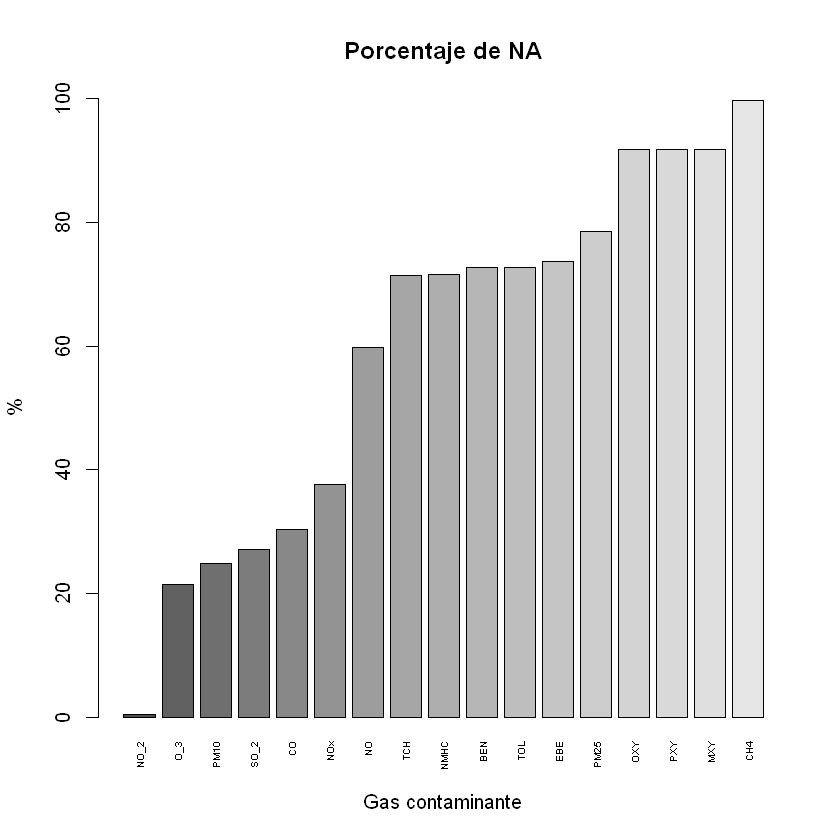

In [131]:
#2)Pintamos grafica de barras para observar volumen NA en los gases contaminantes
barplot(percentageNA, main ="Porcentaje de NA",xlab = "Gas contaminante",ylab = "%",
        ylim = c(0,100), las=3, cex.names=.5, col = gray.colors(17))

In [132]:
#Nos quedamos con aquellos gases que tengan menos del 35% de NA
percentageNA[percentageNA < 35]

NO_2   O_3  PM10  SO_2    CO 
 0.56 21.44 24.87 27.11 30.39

In [133]:
#Procedemos a quitar el resto de columnas
airMadrid$BEN = NULL;
airMadrid$EBE = NULL;
airMadrid$MXY = NULL;
airMadrid$NMHC = NULL;
airMadrid$NOx = NULL;
airMadrid$OXY = NULL;
airMadrid$PXY = NULL;
airMadrid$TCH = NULL;
airMadrid$TOL = NULL;
airMadrid$PM25 = NULL;
airMadrid$NO = NULL;
airMadrid$CH4 = NULL;

#Mostramos dataframe para observar cambios
head(airMadrid)
tail(airMadrid)

date,CO,NO_2,O_3,PM10,SO_2,station
2001-08-01 01:00:00,0.37,58.40,34.53,105.00,6.34,28079001
2001-08-01 01:00:00,0.34,56.25,42.16,100.60,8.11,28079035
2001-08-01 01:00:00,0.28,50.66,46.31,100.10,7.85,28079003
2001-08-01 01:00:00,0.47,69.79,40.65,69.78,6.46,28079004
2001-08-01 01:00:00,0.39,22.83,66.31,75.18,8.80,28079039
2001-08-01 01:00:00,0.63,66.26,33.50,122.70,6.36,28079006


,date,CO,NO_2,O_3,PM10,SO_2,station
3808219,2018-02-01 00:00:00,NA,94,NA,35,NA,28079055
3808220,2018-02-01 00:00:00,0.5,91,1,35,NA,28079056
3808221,2018-02-01 00:00:00,0.7,107,NA,29,15,28079057
3808222,2018-02-01 00:00:00,NA,48,2,NA,NA,28079058
3808223,2018-02-01 00:00:00,NA,103,2,NA,NA,28079059
3808224,2018-02-01 00:00:00,NA,96,3,26,NA,28079060


In [134]:
# Liberamos memoria
rm(percentageNA)
rm(naPerColumn)

### Agrupacion de datos

Dado que las muestras de la contaminación son por hora, se agruparan las mismas realizando la media de cada uno de los gases diaria. Para ello se seguirán los siguientes pasos:
- Mostrar dataframe ordenado por estación
- Cambiar el formato de la fecha
- Agrupar por fecha y mostrar resultado

#### Mostrar dataframe ordenado por estación

Con esta visualización podemos comprobar que efectivamente al ordenar por estación, el siguiente campo ordenado es la fecha de la medición, por lo que mostramos le principio y el final para comprobar el rango de fechas y estaicones.

In [135]:
airMadrid<- airMadrid[order(airMadrid$station),]
head(airMadrid, n=24)
tail(airMadrid)

,date,CO,NO_2,O_3,PM10,SO_2,station
1,2001-08-01 01:00:00,0.37,58.40,34.53,105.00,6.34,28079001
25,2001-08-01 02:00:00,0.42,65.76,27.93,69.75,7.15,28079001
49,2001-08-01 03:00:00,0.32,61.09,32.07,56.22,6.26,28079001
73,2001-08-01 04:00:00,0.23,47.02,42.21,50.69,5.19,28079001
97,2001-08-01 05:00:00,0.19,47.17,48.46,49.49,5.03,28079001
121,2001-08-01 06:00:00,0.06,63.83,40.80,43.47,5.24,28079001
145,2001-08-01 07:00:00,0.28,91.74,22.18,42.19,7.37,28079001
169,2001-08-01 08:00:00,0.89,127.80,11.98,45.72,11.37,28079001
193,2001-08-01 09:00:00,1.51,129.50,9.71,68.46,15.57,28079001
217,2001-08-01 10:00:00,1.80,127.70,8.86,91.84,19.47,28079001


,date,CO,NO_2,O_3,PM10,SO_2,station
2268754,2010-07-31 19:00:00,0.22,17.83,120.20,20.17,6.93,28079099
2268776,2010-07-31 20:00:00,0.23,22.57,112.70,13.95,6.88,28079099
2268798,2010-07-31 21:00:00,0.27,33.91,98.27,22.44,6.84,28079099
2268820,2010-07-31 22:00:00,0.38,64.05,69.79,52.17,6.97,28079099
2268842,2010-07-31 23:00:00,0.50,86.81,49.55,54.36,7.12,28079099
2268864,2010-08-01 00:00:00,0.43,76.33,52.26,47.15,7.03,28079099


#### Cambiar el formato de la fecha

Se cambia el formato de la fecha para realizar la agrupación de los datos por dicha columa.

In [136]:
airMadrid$date <- as.Date(airMadrid$date, format = "%Y-%m-%d")

In [137]:
head(airMadrid, n = 24)
tail(airMadrid)

,date,CO,NO_2,O_3,PM10,SO_2,station
1,2001-08-01,0.37,58.40,34.53,105.00,6.34,28079001
25,2001-08-01,0.42,65.76,27.93,69.75,7.15,28079001
49,2001-08-01,0.32,61.09,32.07,56.22,6.26,28079001
73,2001-08-01,0.23,47.02,42.21,50.69,5.19,28079001
97,2001-08-01,0.19,47.17,48.46,49.49,5.03,28079001
121,2001-08-01,0.06,63.83,40.80,43.47,5.24,28079001
145,2001-08-01,0.28,91.74,22.18,42.19,7.37,28079001
169,2001-08-01,0.89,127.80,11.98,45.72,11.37,28079001
193,2001-08-01,1.51,129.50,9.71,68.46,15.57,28079001
217,2001-08-01,1.80,127.70,8.86,91.84,19.47,28079001


,date,CO,NO_2,O_3,PM10,SO_2,station
2268754,2010-07-31,0.22,17.83,120.20,20.17,6.93,28079099
2268776,2010-07-31,0.23,22.57,112.70,13.95,6.88,28079099
2268798,2010-07-31,0.27,33.91,98.27,22.44,6.84,28079099
2268820,2010-07-31,0.38,64.05,69.79,52.17,6.97,28079099
2268842,2010-07-31,0.50,86.81,49.55,54.36,7.12,28079099
2268864,2010-08-01,0.43,76.33,52.26,47.15,7.03,28079099


In [138]:
dataFrameRainfall$date <- as.Date(dataFrameRainfall$date)
rainfall<-dataFrameRainfall
rm(dataFrameRainfall)
rainfall[is.na(rainfall)] <- 0 # convertir los NAS a ceros para que pinte bien la grafica
head(rainfall, n = 10)

date,quantity
2001-01-01,4.3
2001-01-02,0.1
2001-01-03,2.2
2001-01-04,2.4
2001-01-05,13.3
2001-01-06,0.0
2001-01-07,0.0
2001-01-08,0.0
2001-01-09,1.5
2001-01-10,9.8


#### Agrupar por fecha obteniendo la media diaria de cada gas contaminante

Para los conjuntos de 24 mediciones existentes para cada día y estación, se realiza una media de las mismas, agrupando por estación y por fecha, obteniendo los siguientes resultados:

In [139]:
madrid <- airMadrid %>%
  group_by(station,date) %>%
  summarise(CO = mean(CO, na.rm = TRUE),
            NO_2 = mean(NO_2, na.rm = TRUE),
            O_3 = mean(O_3, na.rm = TRUE),
            PM10 = mean(PM10, na.rm = TRUE),
            SO_2 = mean(SO_2, na.rm = TRUE))
head(madrid)
tail(madrid)
rm(airMadrid)

station,date,CO,NO_2,O_3,PM10,SO_2
28079001,2001-01-02,1.243333,84.53750,12.576667,36.92455,20.28083
28079001,2001-01-03,1.242917,79.75125,10.961250,37.21292,16.23917
28079001,2001-01-04,1.134167,75.39250,12.002917,35.03667,16.75125
28079001,2001-01-05,1.535833,77.14083,8.755833,34.27625,16.00958
28079001,2001-01-06,1.009167,64.47708,13.955417,17.03792,15.35417
28079001,2001-01-07,1.016250,67.06125,12.776250,20.45500,18.43042


station,date,CO,NO_2,O_3,PM10,SO_2
28079099,2010-12-27,0.6770833,83.11375,7.620417,31.41708,15.32375
28079099,2010-12-28,0.7100000,86.31750,7.642500,35.74667,18.47833
28079099,2010-12-29,0.7404167,82.27375,9.689583,31.68542,18.05083
28079099,2010-12-30,0.6145833,68.60792,7.415417,25.95917,13.35000
28079099,2010-12-31,0.4387500,55.20375,14.215417,14.84542,10.28958
28079099,2011-01-01,0.4800000,53.53000,6.850000,19.45000,11.71000


<p style="text-align: justify;">
Observamos que la estacion *28079099* no tiene muestras desde 2011, se debe a que fue dada de baja ese año por lo que se procede a eliminar del estudio. A continuación mostramos el final del data.frame para observar que ya no se encuentra dicha estación.Además sustituimos los NA en las mediciones de los gases por 0 para poder utilizarlos.
</p>

In [140]:
madrid <-  madrid[!madrid$station == 28079099,]
tail(madrid)
madrid[is.na(madrid)] <- 0

station,date,CO,NO_2,O_3,PM10,SO_2
28079060,2018-04-26,NaN,29.041667,77.25000,42.54167,NaN
28079060,2018-04-27,NaN,20.958333,81.83333,29.57143,NaN
28079060,2018-04-28,NaN,8.375000,87.20833,10.33333,NaN
28079060,2018-04-29,NaN,6.958333,93.08333,14.45833,NaN
28079060,2018-04-30,NaN,13.708333,83.33333,12.91667,NaN
28079060,2018-05-01,NaN,14.000000,81.00000,6.00000,NaN


### Visualización de los datos a lo largo de los años

A continuación se procede a visualizar los datos colocados en un timereies tanto a nivel diario como mensual ya que apoyarán al estudio.

#### Grafica con la evolucion de la contaminacion diaria

Convierto el dataframe en un timeseries para visualizar la evolucion diaria

In [141]:
madrid_ts_day <- rowSums(madrid[,3:7]) # agrego los gases contaminantes que corresponden a las columnas 3 a 7
madrid_ts_day <- madrid_ts_day[madrid_ts_day != 0] # elimino los ceros del timeseries porque corresponden a Nas

In [142]:
madrid_ts_day <- ts(madrid_ts_day, start=c(2001, 1), end=c(2018, 1), frequency=365)

In [143]:
rainfall_ts <- ts(rainfall$quantity, start=c(2001, 1), end=c(2018, 1), frequency=365)

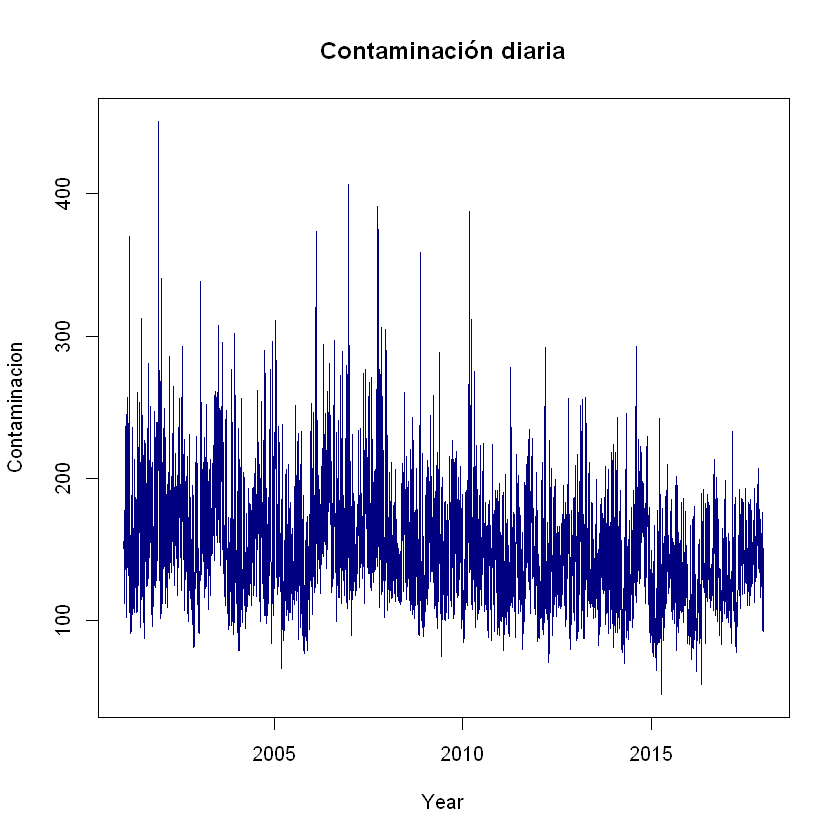

In [144]:
plot(madrid_ts_day,main ="Contaminación diaria", xlab="Year", ylab="Contaminacion",
       col="navy")


*Se puede observar como la contaminacion ha ido disminuyendo a lo largo de los años, asi como los valores diarios maximos de la misma*

#### Graficos con la evolucion de la contaminacion y precipitacion mensuales 

In [145]:
# divido por año, mes y dia
madrid_month_pol <- madrid %>% separate(date, sep="-", into = c("year", "month", "day"))
pollutionMonth <- madrid %>% separate(date, sep="-", into = c("year", "month", "day"))

# sumo todos los dias del año para cada gas
madrid_month_pol <- madrid_month_pol %>%
  group_by(month) %>%
  summarise(CO = mean(CO, na.rm = TRUE),
            NO_2 = mean(NO_2, na.rm = TRUE),
            O_3 = mean(O_3, na.rm = TRUE),
            PM10 = mean(PM10, na.rm = TRUE),
            SO_2 = mean(SO_2, na.rm = TRUE))

madrid_month_pol <- madrid_month_pol[-c(18),] # quito 2018 porque solo llega hasta mayo

madrid_month_pol$totalPollution <- rowSums(madrid_month_pol[,2:6])

head(madrid_month_pol, n = 24)

month,CO,NO_2,O_3,PM10,SO_2,totalPollution
01,0.5322757,58.69813,15.96593,20.61122,11.572505,107.3801
02,0.4726089,54.55779,22.13098,20.07257,10.745318,107.9793
03,0.3724831,47.41064,31.60530,19.27294,8.385831,107.0472
04,0.3169455,43.30190,39.58931,17.44354,6.286833,106.9385
05,0.3000982,43.06757,41.43926,19.42107,5.692493,109.9205
06,0.2791747,44.23049,45.63415,24.34126,5.628239,120.1133
07,0.2705059,44.26465,48.11280,25.74198,5.509665,123.8996
08,0.2490783,40.13439,46.14973,24.92206,5.354324,116.8096
09,0.3290252,50.59877,34.67615,24.13475,5.790693,115.5294
10,0.4014883,55.14091,21.51472,21.79969,6.111997,104.9688


In [146]:
# divido por año, mes y dia
rainfall_month <-rainfall %>% separate(date, sep="-", into = c("year", "month", "day"))
rainfallMonth <-rainfall %>% separate(date, sep="-", into = c("year", "month", "day"))

rainfall_month <- rainfall_month %>%
  group_by(month) %>%
  summarise(quantity = mean(quantity, na.rm = TRUE))

rainfall_month <- rainfall_month[-c(18),] # quito 2018 como en la tabla de contaminacion


head(rainfall_month, n = 12)

month,quantity
01,1.1403922
02,1.5004598
03,1.8750000
04,1.4612335
05,1.5126294
06,0.6019190
07,0.1554687
08,0.2500921
09,0.4092308
10,2.1889513


In [147]:
cont_lluvia <- merge ( x = madrid_month_pol, y = rainfall_month, by = "month")
head(cont_lluvia, n = 12)

month,CO,NO_2,O_3,PM10,SO_2,totalPollution,quantity
01,0.5322757,58.69813,15.96593,20.61122,11.572505,107.3801,1.1403922
02,0.4726089,54.55779,22.13098,20.07257,10.745318,107.9793,1.5004598
03,0.3724831,47.41064,31.60530,19.27294,8.385831,107.0472,1.8750000
04,0.3169455,43.30190,39.58931,17.44354,6.286833,106.9385,1.4612335
05,0.3000982,43.06757,41.43926,19.42107,5.692493,109.9205,1.5126294
06,0.2791747,44.23049,45.63415,24.34126,5.628239,120.1133,0.6019190
07,0.2705059,44.26465,48.11280,25.74198,5.509665,123.8996,0.1554687
08,0.2490783,40.13439,46.14973,24.92206,5.354324,116.8096,0.2500921
09,0.3290252,50.59877,34.67615,24.13475,5.790693,115.5294,0.4092308
10,0.4014883,55.14091,21.51472,21.79969,6.111997,104.9688,2.1889513


In [148]:
# sumo todos los dias del año para cada gas
pollutionMonth <- pollutionMonth %>%
  group_by(month,year) %>%
  summarise(CO = mean(CO, na.rm = TRUE),
            NO_2 = mean(NO_2, na.rm = TRUE),
            O_3 = mean(O_3, na.rm = TRUE),
            PM10 = mean(PM10, na.rm = TRUE),
            SO_2 = mean(SO_2, na.rm = TRUE))

pollutionMonth <- pollutionMonth[-c(18),] # quito 2018 porque solo llega hasta mayo
pollutionMonth$totalPollution <- rowSums(pollutionMonth[,3:7])
head(pollutionMonth)

month,year,CO,NO_2,O_3,PM10,SO_2,totalPollution
01,2001,1.1599895,57.09584,19.48279,28.36042,25.03678,131.1358
01,2002,1.1613879,73.93776,11.36514,35.05234,24.10764,145.6243
01,2003,0.8837084,60.00333,21.33468,27.47519,17.94549,127.6424
01,2004,0.8502713,62.50563,14.14384,32.30979,17.33414,127.1437
01,2005,1.0244072,80.94088,15.30101,40.85559,22.75261,160.8745
01,2006,0.7408129,70.50429,16.04197,29.45637,15.14368,131.8871


In [149]:
rainfallMonth <- rainfallMonth %>%
  group_by(month,year) %>%
  summarise(quantity = mean(quantity, na.rm = TRUE))

rainfallMonth <- rainfallMonth[-c(18),] # quito 2018 como en la tabla de contaminacion


head(rainfallMonth, n = 12)

month,year,quantity
01,2001,2.1387097
01,2002,2.2517241
01,2003,1.2838710
01,2004,0.2225806
01,2005,0.0000000
01,2006,0.3548387
01,2007,0.4222222
01,2008,0.0000000
01,2009,0.6458333
01,2010,1.8400000


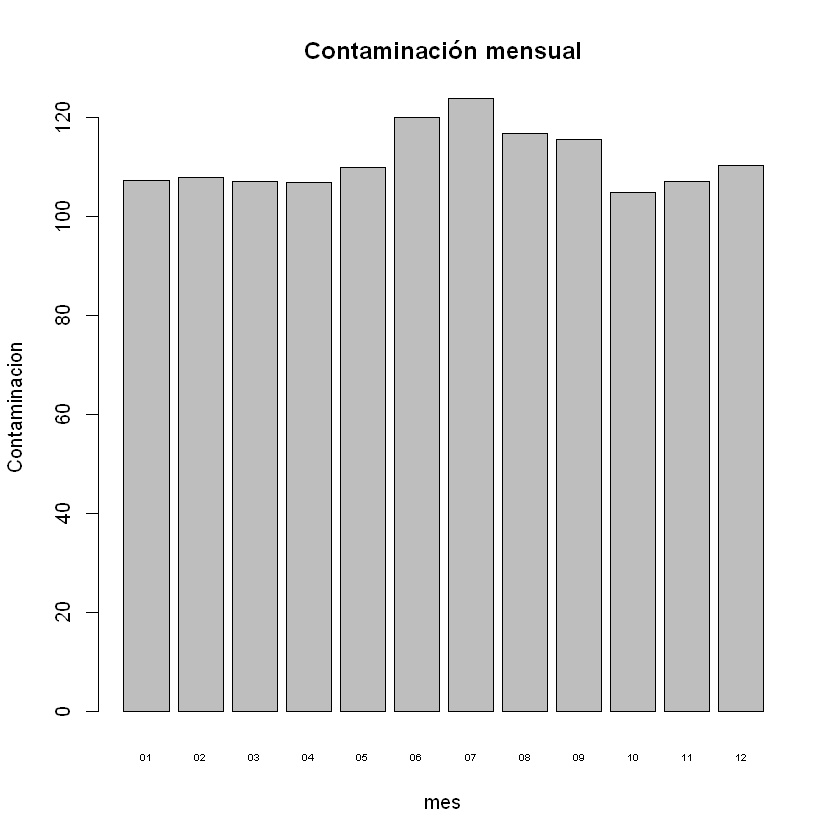

In [150]:
barplot(madrid_month_pol$totalPollution, main ="Contaminación mensual",xlab = "mes",ylab = "Contaminacion", 
        names.arg= madrid_month_pol$month, cex.names=.5)

*Se puede observar que en los meses mas calidos como junio, julio, agosto y septiembre la contaminacion es mayor, esto nos puede llevar a pensar que aspectos meteorologicos como la lluvia, la temperatura y el viento pueden afectar a la calidad del aire*

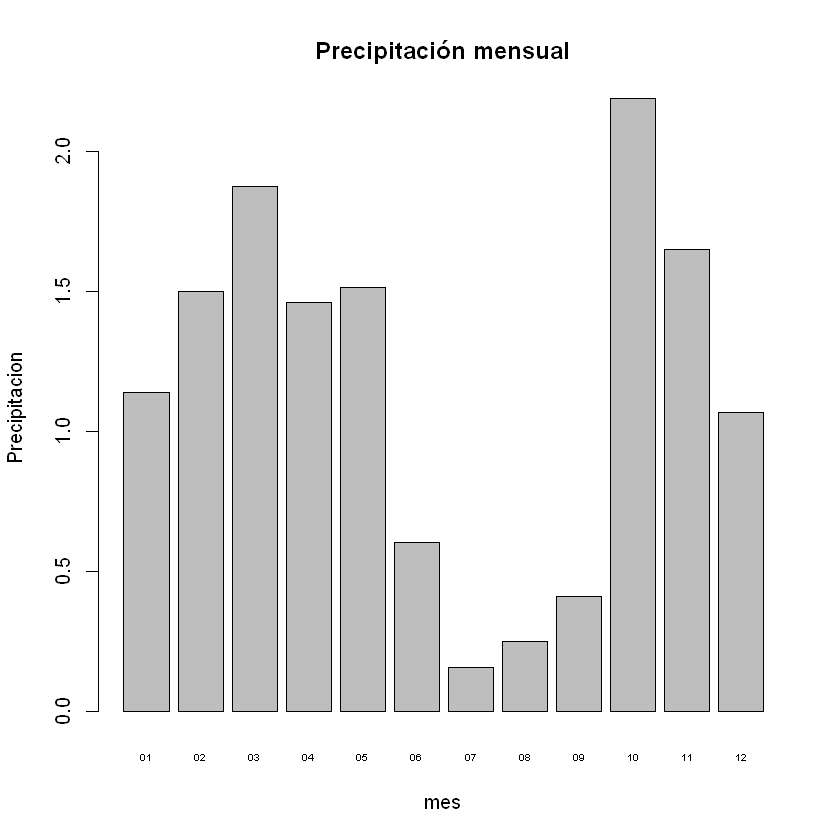

In [151]:
barplot(rainfall_month$quantity, main ="Precipitación mensual",xlab = "mes",ylab = "Precipitacion", 
        names.arg= rainfall_month$month, cex.names=.5)

*La escasez de lluvias en junio, julio, agosto y septiembre podria ser una de las causas del incremento de la contaminacion en dichos meses*

#### Graficas con la evolucion de la contaminacion y precipitaciones anuales

In [152]:
# divido por año, mes y dia
madrid_year_pol <- madrid %>% separate(date, sep="-", into = c("year", "month", "day"))

# sumo todos los dias del año para cada gas
madrid_year_pol <- madrid_year_pol %>%
  group_by(year) %>%
  summarise(CO = mean(CO, na.rm = TRUE),
            NO_2 = mean(NO_2, na.rm = TRUE),
            O_3 = mean(O_3, na.rm = TRUE),
            PM10 = mean(PM10, na.rm = TRUE),
            SO_2 = mean(SO_2, na.rm = TRUE))

madrid_year_pol <- madrid_year_pol[-c(18),] # quito 2018 porque solo llega hasta mayo

madrid_year_pol$totalPollution <- rowSums(madrid_year_pol[,2:6]) # agrego los gases contaminantes que corresponden a las columnas 2 a 6
head(madrid_year_pol, n = 18)


year,CO,NO_2,O_3,PM10,SO_2,totalPollution
2001,0.9187882,62.82798,31.49312,33.162744,18.467736,146.87037
2002,0.7596355,61.62228,32.90807,32.048891,13.046063,140.38495
2003,0.6490758,58.32876,35.59862,35.256394,12.338463,142.17131
2004,0.6042677,60.69967,31.87525,32.645620,11.332865,137.15768
2005,0.6008010,61.77556,33.14906,33.850547,11.798912,141.17488
2006,0.5292033,60.47735,33.27212,36.706542,10.738491,141.72371
2007,0.4563528,59.96227,33.00113,32.907991,10.923937,137.25168
2008,0.3785764,55.26895,37.39494,25.964743,10.554222,129.56143
2009,0.3472648,54.26650,42.42792,22.345414,10.157301,129.54440
2010,0.1539908,44.16647,28.16330,10.679587,4.103196,87.26655


In [153]:
# divido por año, mes y dia
rainfall_year <-rainfall %>% separate(date, sep="-", into = c("year", "month", "day"))

rainfall_year <- rainfall_year %>%
  group_by(year) %>%
  summarise(quantity = mean(quantity, na.rm = TRUE))

rainfall_year <- rainfall_year[-c(18),] # quito 2018 como en la tabla de contaminacion

head(rainfall_year, n = 18)

year,quantity
2001,0.9881215
2002,1.2521739
2003,1.5134503
2004,1.3080110
2005,0.5388350
2006,0.8429825
2007,1.0287671
2008,0.7156627
2009,0.6485531
2010,1.3064067


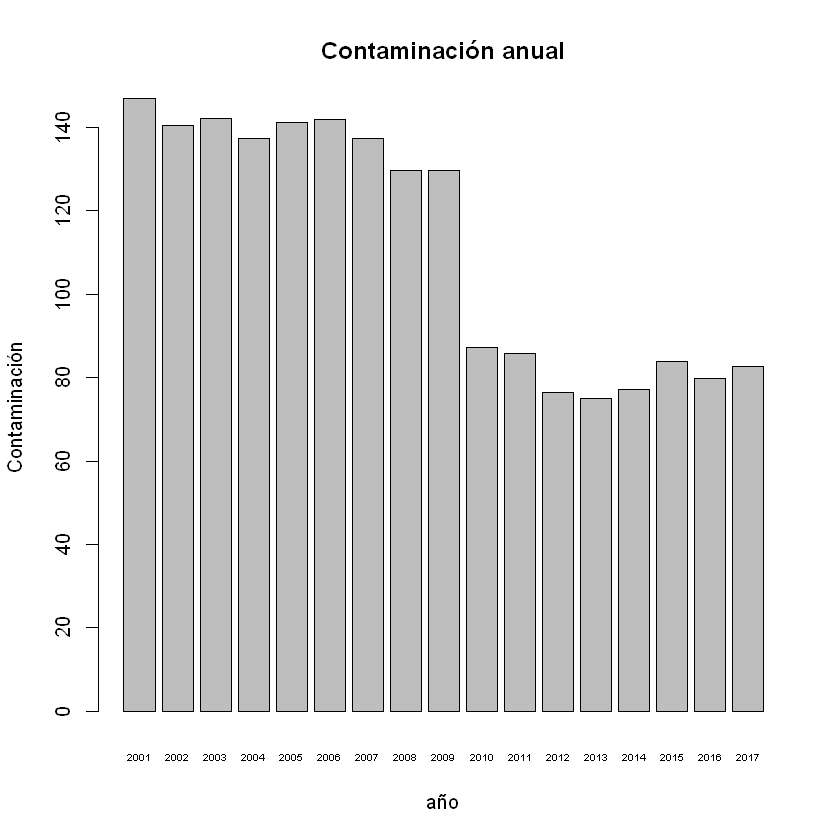

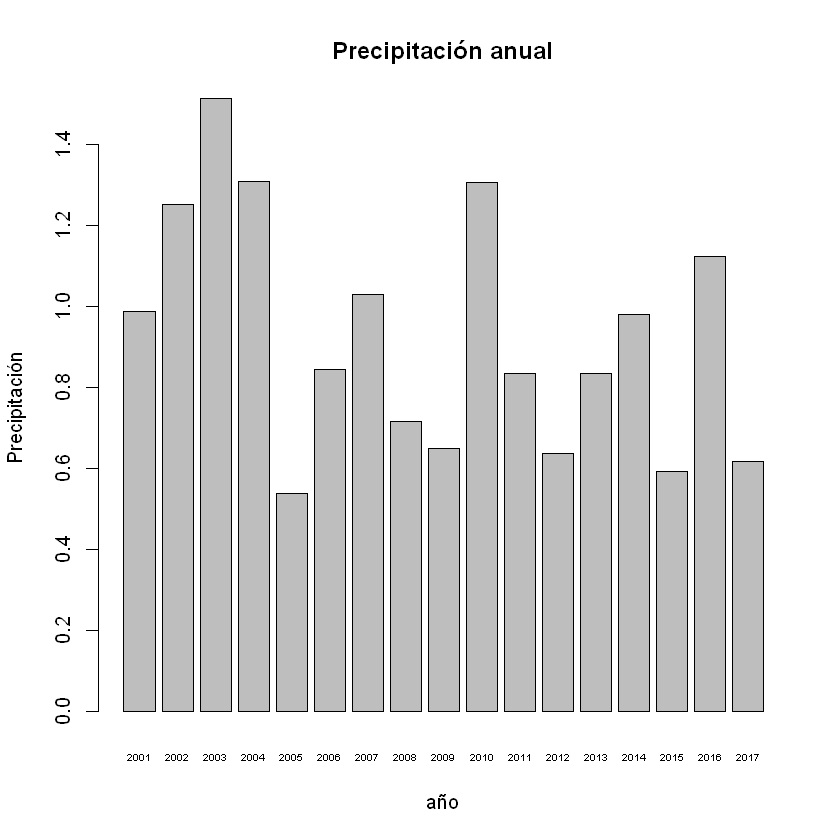

In [154]:
barplot(madrid_year_pol$totalPollution, main ="Contaminación anual",xlab = "año",ylab = "Contaminación", 
        names.arg= madrid_year_pol$year, cex.names=.5)

barplot(rainfall_year$quantity, main ="Precipitación anual",xlab = "año",ylab = "Precipitación", 
        names.arg= rainfall_year$year, cex.names=.5)

<p style="text-align: justify;">
No podemos sacar conclusiones claras cuando evaluamos la contaminacion y precipitaciones anuales, lo que si se observa es un descenso notable de la contaminacion a partir de 2009, y entre los años 2015 a 2017 el aumento de las precipitaciones en el año 2016 parece provocar un descenso en el nivel de contaminacion
</p>

## Correlacion de variables

In [155]:
madrid_cor <- madrid
head(madrid_cor)

station,date,CO,NO_2,O_3,PM10,SO_2
28079001,2001-01-02,1.243333,84.53750,12.576667,36.92455,20.28083
28079001,2001-01-03,1.242917,79.75125,10.961250,37.21292,16.23917
28079001,2001-01-04,1.134167,75.39250,12.002917,35.03667,16.75125
28079001,2001-01-05,1.535833,77.14083,8.755833,34.27625,16.00958
28079001,2001-01-06,1.009167,64.47708,13.955417,17.03792,15.35417
28079001,2001-01-07,1.016250,67.06125,12.776250,20.45500,18.43042


In [156]:
madrid_cor <- merge ( x = madrid_cor, y = rainfall, by = "date")
madrid_cor <- madrid_cor[order(madrid_cor$station),]
head(madrid_cor)

,date,station,CO,NO_2,O_3,PM10,SO_2,quantity
32,2001-01-02,28079001,1.243333,84.53750,12.576667,36.92455,20.28083,0.1
57,2001-01-03,28079001,1.242917,79.75125,10.961250,37.21292,16.23917,2.2
80,2001-01-04,28079001,1.134167,75.39250,12.002917,35.03667,16.75125,2.4
116,2001-01-05,28079001,1.535833,77.14083,8.755833,34.27625,16.00958,13.3
138,2001-01-06,28079001,1.009167,64.47708,13.955417,17.03792,15.35417,0.0
168,2001-01-07,28079001,1.016250,67.06125,12.776250,20.45500,18.43042,0.0


In [157]:
madrid_cor$date = NULL
madrid_cor$station = NULL
head(madrid_cor)

,CO,NO_2,O_3,PM10,SO_2,quantity
32,1.243333,84.53750,12.576667,36.92455,20.28083,0.1
57,1.242917,79.75125,10.961250,37.21292,16.23917,2.2
80,1.134167,75.39250,12.002917,35.03667,16.75125,2.4
116,1.535833,77.14083,8.755833,34.27625,16.00958,13.3
138,1.009167,64.47708,13.955417,17.03792,15.35417,0.0
168,1.016250,67.06125,12.776250,20.45500,18.43042,0.0


In [158]:
# Añadimos columnas gases contaminantes dia siguiente
madrid_cor$CO_NextDay <- c(madrid_cor$CO[-1], NA)
madrid_cor$NO2_NextDay <- c(madrid_cor$NO_2[-1], NA)
madrid_cor$O_3NextDay <- c(madrid_cor$O_3[-1], NA)
madrid_cor$PM10_NextDay <- c(madrid_cor$PM10[-1], NA)
madrid_cor$SO_2NextDay <- c(madrid_cor$SO_2[-1], NA)

# Quitamos columnas gases contaminantes dia actual
madrid_cor$CO = NULL
madrid_cor$NO_2 = NULL
madrid_cor$O_3 = NULL
madrid_cor$PM10 = NULL
madrid_cor$SO_2 = NULL

head(madrid_cor)

,quantity,CO_NextDay,NO2_NextDay,O_3NextDay,PM10_NextDay,SO_2NextDay
32,0.1,1.242917,79.75125,10.961250,37.21292,16.23917
57,2.2,1.134167,75.39250,12.002917,35.03667,16.75125
80,2.4,1.535833,77.14083,8.755833,34.27625,16.00958
116,13.3,1.009167,64.47708,13.955417,17.03792,15.35417
138,0.0,1.016250,67.06125,12.776250,20.45500,18.43042
168,0.0,1.293750,92.57000,10.875833,45.59958,26.75167


In [159]:
# Calculamos el maximo entre todos los gases del dia siguiente y la polucion total del dia siguiente
madrid_cor$maxNextDay <- apply(madrid_cor[,2:6], 1, FUN=max)
head(madrid_cor)

,quantity,CO_NextDay,NO2_NextDay,O_3NextDay,PM10_NextDay,SO_2NextDay,maxNextDay
32,0.1,1.242917,79.75125,10.961250,37.21292,16.23917,79.75125
57,2.2,1.134167,75.39250,12.002917,35.03667,16.75125,75.39250
80,2.4,1.535833,77.14083,8.755833,34.27625,16.00958,77.14083
116,13.3,1.009167,64.47708,13.955417,17.03792,15.35417,64.47708
138,0.0,1.016250,67.06125,12.776250,20.45500,18.43042,67.06125
168,0.0,1.293750,92.57000,10.875833,45.59958,26.75167,92.57000


In [160]:
madrid_cor$totalPolNextDay <- rowSums(madrid_cor[,2:6])
head(madrid_cor)

,quantity,CO_NextDay,NO2_NextDay,O_3NextDay,PM10_NextDay,SO_2NextDay,maxNextDay,totalPolNextDay
32,0.1,1.242917,79.75125,10.961250,37.21292,16.23917,79.75125,145.4075
57,2.2,1.134167,75.39250,12.002917,35.03667,16.75125,75.39250,140.3175
80,2.4,1.535833,77.14083,8.755833,34.27625,16.00958,77.14083,137.7183
116,13.3,1.009167,64.47708,13.955417,17.03792,15.35417,64.47708,111.8338
138,0.0,1.016250,67.06125,12.776250,20.45500,18.43042,67.06125,119.7392
168,0.0,1.293750,92.57000,10.875833,45.59958,26.75167,92.57000,177.0908


## Tabla de correlaciones

In [161]:
res <- cor(madrid_cor, use = "complete.obs")
round(res, 2)

,quantity,CO_NextDay,NO2_NextDay,O_3NextDay,PM10_NextDay,SO_2NextDay,maxNextDay,totalPolNextDay
quantity,1.00,-0.03,-0.09,-0.03,-0.12,-0.05,-0.10,-0.12
CO_NextDay,-0.03,1.00,0.59,-0.13,0.53,0.75,0.46,0.63
NO2_NextDay,-0.09,0.59,1.00,-0.33,0.54,0.52,0.68,0.70
O_3NextDay,-0.03,-0.13,-0.33,1.00,-0.13,-0.16,0.26,0.30
PM10_NextDay,-0.12,0.53,0.54,-0.13,1.00,0.51,0.47,0.76
SO_2NextDay,-0.05,0.75,0.52,-0.16,0.51,1.00,0.37,0.60
maxNextDay,-0.10,0.46,0.68,0.26,0.47,0.37,1.00,0.80
totalPolNextDay,-0.12,0.63,0.70,0.30,0.76,0.60,0.80,1.00


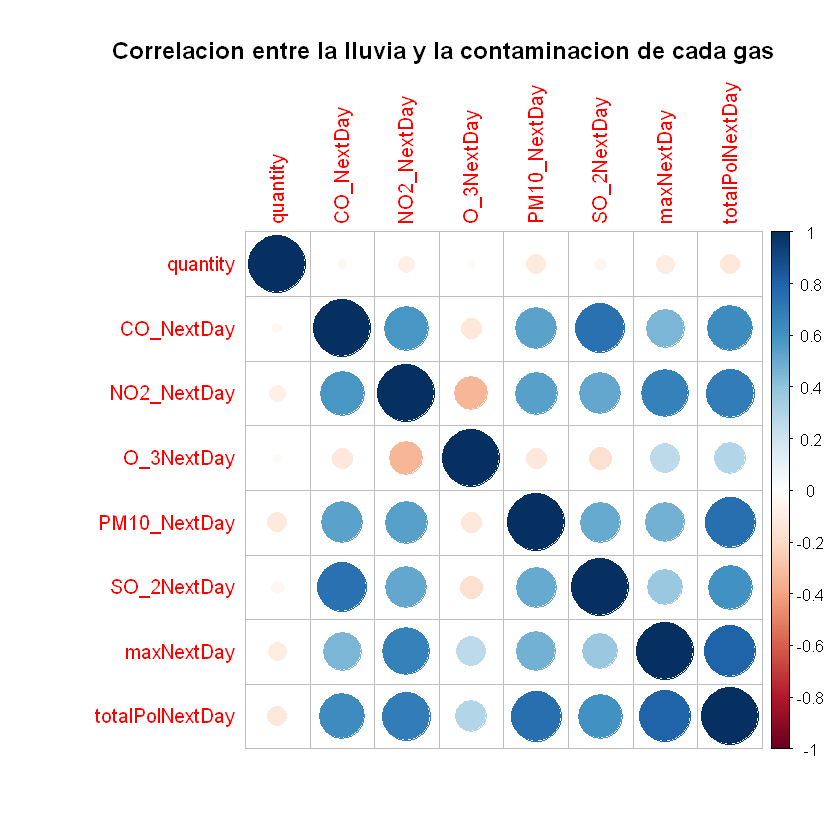

In [162]:
corrplot(res)
title("Correlacion entre la lluvia y la contaminacion de cada gas")

Las correlaciones más altas que hemos obtenido con la lluvia del dia anterior han sido con la polución total y con el gas más contaminante del día siguiente,

 –0,12 y – 0,10 respectivamente​

### Preparacion para el modelo
Se van a crear tres dataframes, para la aplicación posterior del modelo a cada uno de ellos, estos dataframes serán:
- version01: Dataframe que contiene los datos discretizados siguiendo índices obtenidos en fuentes que se indicarán a posteriori.
- version02: Dataframe que contiene los datos discretizados a nivel mensual
- version03: Dataframe que contiene los datos discretizados por cuartiles en tres variables categoricas.  
    - Una situada hasta el primer cuartil (_data_ <= Q1)
    - Otro siatuada entre el primer y tercer cuartil (Q1< _data_ <= Q3)  
    - La última para datos superiores al tercer cuartil (_data_> Q3)

### Prepación para el modelo version01

Tras los pasos anteriores se procederá a realizar la discretización de las variables dependientes que formarán parte del modelo para preparar el dataframe para el modelo.

A lo largo de esta fase se utilziarán los iguientes términos:
- AQ (Air Index): Representa mediciones numéricas
- AIQ (Air Index Quality): Reprersenta mediciones ya discretizadas

#### Discretizamos la calidad del aire
Para ello nos guiraremos de la siguiente tabla, de cada fila se escogerá el mayor de todos los contaminantes y se comparara con la tabla adjunta:

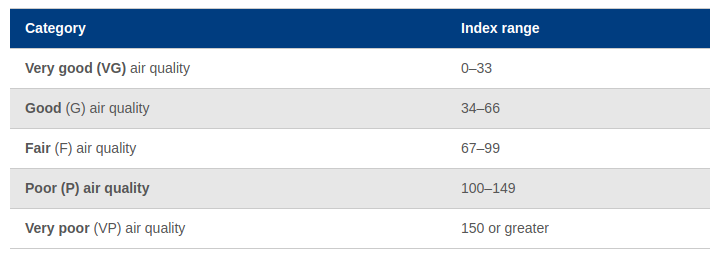

Fuente: https://www.epa.vic.gov.au/your-environment/air/air-pollution/air-quality-index/calculating-a-station-air-quality-index

Para ello cogemos el maximo valor de cada fila entre los gases y lo añadimos como una columna nueva al data frame

In [163]:
auxData <- madrid
auxData$date=NULL
auxData$station = NULL
auxData[, "AQ"] <- apply(auxData ,1, max)
auxData$CO=NULL
auxData$NO_2 = NULL
auxData$O_3 = NULL
auxData$PM10 = NULL
auxData$SO_2 = NULL
madrid <- cbind(madrid,auxData)
head(madrid)

station,date,CO,NO_2,O_3,PM10,SO_2,AQ
28079001,2001-01-02,1.243333,84.53750,12.576667,36.92455,20.28083,84.53750
28079001,2001-01-03,1.242917,79.75125,10.961250,37.21292,16.23917,79.75125
28079001,2001-01-04,1.134167,75.39250,12.002917,35.03667,16.75125,75.39250
28079001,2001-01-05,1.535833,77.14083,8.755833,34.27625,16.00958,77.14083
28079001,2001-01-06,1.009167,64.47708,13.955417,17.03792,15.35417,64.47708
28079001,2001-01-07,1.016250,67.06125,12.776250,20.45500,18.43042,67.06125


A continuación discretizamos la columna anterior, creando una nueva columna con los siguientes valores:

    Very good(VG)  
    Good (G)  
    Fair(F)  
    Poor (P)  
    Very Poor (VP)  

In [164]:
madrid[,"AIQ"] <- madrid$AQ
head(madrid)

station,date,CO,NO_2,O_3,PM10,SO_2,AQ,AIQ
28079001,2001-01-02,1.243333,84.53750,12.576667,36.92455,20.28083,84.53750,84.53750
28079001,2001-01-03,1.242917,79.75125,10.961250,37.21292,16.23917,79.75125,79.75125
28079001,2001-01-04,1.134167,75.39250,12.002917,35.03667,16.75125,75.39250,75.39250
28079001,2001-01-05,1.535833,77.14083,8.755833,34.27625,16.00958,77.14083,77.14083
28079001,2001-01-06,1.009167,64.47708,13.955417,17.03792,15.35417,64.47708,64.47708
28079001,2001-01-07,1.016250,67.06125,12.776250,20.45500,18.43042,67.06125,67.06125


In [165]:
madrid <- madrid %>%
        mutate(AIQ = case_when (
        
        AIQ>=0 & AIQ <=33       ~"VERY GOOD",
        AIQ >=34 & AIQ <=66     ~"GOOD",
        AIQ >=37 & AIQ <=99     ~"FAIR",
        AIQ >=100 & AIQ <=149   ~"POOR",
        AIQ >=150               ~"VERY POOR",
        TRUE                    ~"NA",
        ))

    
head(madrid)

station,date,CO,NO_2,O_3,PM10,SO_2,AQ,AIQ
28079001,2001-01-02,1.243333,84.53750,12.576667,36.92455,20.28083,84.53750,FAIR
28079001,2001-01-03,1.242917,79.75125,10.961250,37.21292,16.23917,79.75125,FAIR
28079001,2001-01-04,1.134167,75.39250,12.002917,35.03667,16.75125,75.39250,FAIR
28079001,2001-01-05,1.535833,77.14083,8.755833,34.27625,16.00958,77.14083,FAIR
28079001,2001-01-06,1.009167,64.47708,13.955417,17.03792,15.35417,64.47708,GOOD
28079001,2001-01-07,1.016250,67.06125,12.776250,20.45500,18.43042,67.06125,FAIR


In [166]:
madrid[,"AQNextDay"] <- NA
madrid[,"AIQNextDay"] <- NA
head(madrid)

station,date,CO,NO_2,O_3,PM10,SO_2,AQ,AIQ,AQNextDay,AIQNextDay
28079001,2001-01-02,1.243333,84.53750,12.576667,36.92455,20.28083,84.53750,FAIR,NA,NA
28079001,2001-01-03,1.242917,79.75125,10.961250,37.21292,16.23917,79.75125,FAIR,NA,NA
28079001,2001-01-04,1.134167,75.39250,12.002917,35.03667,16.75125,75.39250,FAIR,NA,NA
28079001,2001-01-05,1.535833,77.14083,8.755833,34.27625,16.00958,77.14083,FAIR,NA,NA
28079001,2001-01-06,1.009167,64.47708,13.955417,17.03792,15.35417,64.47708,GOOD,NA,NA
28079001,2001-01-07,1.016250,67.06125,12.776250,20.45500,18.43042,67.06125,FAIR,NA,NA


In [167]:
#Falta alñadir la restricionde que cuando ponemos la del dia suigiente, al tener varias estaciones cuando una estacion no coincide con la anterior ignorarlo
#for(i in 2:nrow(madrid)-1) {
  #if(madrid[i-1,"station"] == madrid[i,"station"]){
      #madrid[i,"AQNextDay"] = madrid[i+1,"AQ"]
      #madrid[i,"AIQNextDay"] = madrid[i+1,"AIQ"]
  #}
#}

madrid$AQNextDay <- c(madrid$AQ[-1],NA)
madrid$AIQNextDay <- c(madrid$AIQ[-1],NA)

madrid02<- madrid #lo guardamos para la siguiente version
head(madrid)

station,date,CO,NO_2,O_3,PM10,SO_2,AQ,AIQ,AQNextDay,AIQNextDay
28079001,2001-01-02,1.243333,84.53750,12.576667,36.92455,20.28083,84.53750,FAIR,79.75125,FAIR
28079001,2001-01-03,1.242917,79.75125,10.961250,37.21292,16.23917,79.75125,FAIR,75.39250,FAIR
28079001,2001-01-04,1.134167,75.39250,12.002917,35.03667,16.75125,75.39250,FAIR,77.14083,FAIR
28079001,2001-01-05,1.535833,77.14083,8.755833,34.27625,16.00958,77.14083,FAIR,64.47708,GOOD
28079001,2001-01-06,1.009167,64.47708,13.955417,17.03792,15.35417,64.47708,GOOD,67.06125,FAIR
28079001,2001-01-07,1.016250,67.06125,12.776250,20.45500,18.43042,67.06125,FAIR,92.57000,FAIR


#### Discretizamos el volumen de precipitaciones

Para ello nos guiraremos de la siguiente tabla, de cada fila se escogerá la cantidad y se comparara con la tabla adjunta:

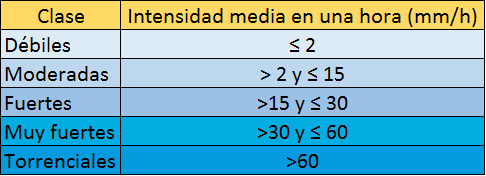

In [168]:
rainfall[,"rainfallVolume"] <- rainfall$quantity
head(rainfall)

date,quantity,rainfallVolume
2001-01-01,4.3,4.3
2001-01-02,0.1,0.1
2001-01-03,2.2,2.2
2001-01-04,2.4,2.4
2001-01-05,13.3,13.3
2001-01-06,0.0,0.0


In [169]:
rainfall <- rainfall %>%
        mutate(rainfallVolume = case_when (
             
        rainfall$rainfallVolume <= 2                                      ~ "WEAK",
        rainfall$rainfallVolume > 2 & rainfall$rainfallVolume <= 15       ~ "MODERATE",
        rainfall$rainfallVolume > 15 & rainfall$rainfallVolume <= 30      ~ "STRONG",
        rainfall$rainfallVolume > 30 & rainfall$rainfallVolume <=60       ~ "VERY STRONG",
        rainfall$rainfallVolume > 60                                      ~ "TORRENTIAL RAIN",
        TRUE                                                              ~"NA",
        ))
head(rainfall)
tail(rainfall)

date,quantity,rainfallVolume
2001-01-01,4.3,MODERATE
2001-01-02,0.1,WEAK
2001-01-03,2.2,MODERATE
2001-01-04,2.4,MODERATE
2001-01-05,13.3,MODERATE
2001-01-06,0.0,WEAK


,date,quantity,rainfallVolume
5933,2018-12-26,0,WEAK
5934,2018-12-27,0,WEAK
5935,2018-12-28,0,WEAK
5936,2018-12-29,0,WEAK
5937,2018-12-30,0,WEAK
5938,2018-12-31,0,WEAK


#### Discretizamos la fuerza del viento

Para ello nos guiraremos de la siguiente tabla, de cada fila se escogerá el viento y se comparara con la tabla adjunta:

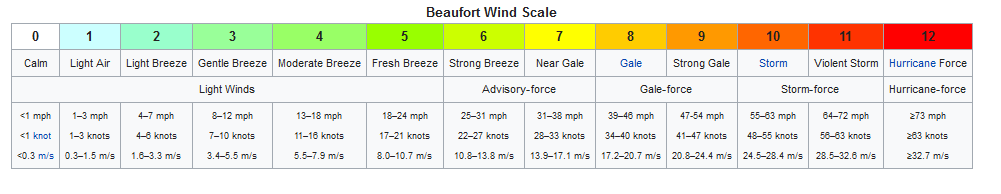

A continuación discretizamos la columna anterior, creando una nueva columna con los siguientes valores:

    LIGTH WIND (LW) 
    ADVISORY FORCE (AF)
    GALE FORCE (GF)
    STORM FORCE (SF)
    HURRICANE FORCE (HF)

In [170]:
wind[,"WindIndexQuality"] <- wind$Speed
wind <- wind %>%
        mutate(WindIndexQuality = case_when (
        
        WindIndexQuality >=0.0 & WindIndexQuality  <=10.7       ~"LIGHT WIND",
        WindIndexQuality >=10.8 & WindIndexQuality <=17.1       ~"ADVISORY FORCE",
        WindIndexQuality >=17.2 & WindIndexQuality <=24.4       ~"GALE FORCE",
        WindIndexQuality >=24.5 & WindIndexQuality <=32.6       ~"STORM FORCE",
        WindIndexQuality >=32.7                                 ~"HURRICANE FORCE",
        TRUE                                                    ~"NA",
        ))
head(wind)
tail(wind)

date,Speed,WindIndexQuality
2001-01-01,1.1,LIGHT WIND
2001-01-02,3.6,LIGHT WIND
2001-01-03,1.7,LIGHT WIND
2001-01-04,3.3,LIGHT WIND
2001-01-05,1.1,LIGHT WIND
2001-01-06,2.5,LIGHT WIND


,date,Speed,WindIndexQuality
5854,2018-12-26,0.6,LIGHT WIND
5855,2018-12-27,0.6,LIGHT WIND
5856,2018-12-28,1.4,LIGHT WIND
5857,2018-12-29,1.7,LIGHT WIND
5858,2018-12-30,1.1,LIGHT WIND
5859,2018-12-31,0.3,LIGHT WIND


#### Cruzamos los datos

Finalmente como último paso previo a la aplicación del modelo se uniraron todos lod datos en un único dataframe

In [171]:
# Cruzamos los datos de las precipitaciones y la contaminacion por fecha 
version01 <- merge ( x = madrid, y = rainfall, by = "date")
version01 <- version01[order(version01$station),]
head(version01)

,date,station,CO,NO_2,O_3,PM10,SO_2,AQ,AIQ,AQNextDay,AIQNextDay,quantity,rainfallVolume
32,2001-01-02,28079001,1.243333,84.53750,12.576667,36.92455,20.28083,84.53750,FAIR,79.75125,FAIR,0.1,WEAK
57,2001-01-03,28079001,1.242917,79.75125,10.961250,37.21292,16.23917,79.75125,FAIR,75.39250,FAIR,2.2,MODERATE
80,2001-01-04,28079001,1.134167,75.39250,12.002917,35.03667,16.75125,75.39250,FAIR,77.14083,FAIR,2.4,MODERATE
116,2001-01-05,28079001,1.535833,77.14083,8.755833,34.27625,16.00958,77.14083,FAIR,64.47708,GOOD,13.3,MODERATE
138,2001-01-06,28079001,1.009167,64.47708,13.955417,17.03792,15.35417,64.47708,GOOD,67.06125,FAIR,0.0,WEAK
168,2001-01-07,28079001,1.016250,67.06125,12.776250,20.45500,18.43042,67.06125,FAIR,92.57000,FAIR,0.0,WEAK


In [172]:
# Cruzamos los datos con el viento
version01 <- merge ( x = version01, y = wind, by = "date",)
version01 <- version01[order(version01$station),]
head(version01)

,date,station,CO,NO_2,O_3,PM10,SO_2,AQ,AIQ,AQNextDay,AIQNextDay,quantity,rainfallVolume,Speed,WindIndexQuality
35,2001-01-02,28079001,1.243333,84.53750,12.576667,36.92455,20.28083,84.53750,FAIR,79.75125,FAIR,0.1,WEAK,3.6,LIGHT WIND
63,2001-01-03,28079001,1.242917,79.75125,10.961250,37.21292,16.23917,79.75125,FAIR,75.39250,FAIR,2.2,MODERATE,1.7,LIGHT WIND
95,2001-01-04,28079001,1.134167,75.39250,12.002917,35.03667,16.75125,75.39250,FAIR,77.14083,FAIR,2.4,MODERATE,3.3,LIGHT WIND
106,2001-01-05,28079001,1.535833,77.14083,8.755833,34.27625,16.00958,77.14083,FAIR,64.47708,GOOD,13.3,MODERATE,1.1,LIGHT WIND
126,2001-01-06,28079001,1.009167,64.47708,13.955417,17.03792,15.35417,64.47708,GOOD,67.06125,FAIR,0.0,WEAK,2.5,LIGHT WIND
162,2001-01-07,28079001,1.016250,67.06125,12.776250,20.45500,18.43042,67.06125,FAIR,92.57000,FAIR,0.0,WEAK,2.2,LIGHT WIND


### Preparación para el modelo version02

Para esta parte del estudio, se han obtenido los cuartiles correspondientes a la precipitación y contaminación anumal para discretizar el mismo

In [173]:
head(pollutionMonth)

month,year,CO,NO_2,O_3,PM10,SO_2,totalPollution
01,2001,1.1599895,57.09584,19.48279,28.36042,25.03678,131.1358
01,2002,1.1613879,73.93776,11.36514,35.05234,24.10764,145.6243
01,2003,0.8837084,60.00333,21.33468,27.47519,17.94549,127.6424
01,2004,0.8502713,62.50563,14.14384,32.30979,17.33414,127.1437
01,2005,1.0244072,80.94088,15.30101,40.85559,22.75261,160.8745
01,2006,0.7408129,70.50429,16.04197,29.45637,15.14368,131.8871


#### Discretizacion con cuartiles

In [174]:
summary(pollutionMonth$totalPollution)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  64.41   81.68  118.48  110.60  136.86  180.02 

Discretizamos cuartiles

In [175]:
madrid_cuart <- pollutionMonth

In [176]:
madrid_cuart$calidadAire <- madrid_cuart$totalPollution

madrid_cuart <- madrid_cuart %>%
        mutate(calidadAire = case_when (
        calidadAire <  81.68                               ~"ALTA",
        calidadAire >= 81.68  & calidadAire < 110.60       ~"MEDIA",
        calidadAire >= 110.60 & calidadAire < 136.86       ~"BAJA",
        calidadAire >= 136.86                            ~"MUY BAJA",
        TRUE                                               ~"NA",
        ))
madrid_cuart$date <- as.yearmon(paste(madrid_cuart$year, madrid_cuart$month), "%Y %m")
madrid_cuart$month=NULL
madrid_cuart$year=NULL
head(madrid_cuart)

CO,NO_2,O_3,PM10,SO_2,totalPollution,calidadAire,date
1.1599895,57.09584,19.48279,28.36042,25.03678,131.1358,BAJA,ene. 2001
1.1613879,73.93776,11.36514,35.05234,24.10764,145.6243,MUY BAJA,ene. 2002
0.8837084,60.00333,21.33468,27.47519,17.94549,127.6424,BAJA,ene. 2003
0.8502713,62.50563,14.14384,32.30979,17.33414,127.1437,BAJA,ene. 2004
1.0244072,80.94088,15.30101,40.85559,22.75261,160.8745,MUY BAJA,ene. 2005
0.7408129,70.50429,16.04197,29.45637,15.14368,131.8871,BAJA,ene. 2006


In [177]:
summary(rainfallMonth$quantity)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2034  0.6300  1.0984  1.5935 11.9226 

In [178]:
rainfall_cuart <- rainfallMonth
rainfall_cuart$lluvia <- rainfall_cuart$quantity

rainfall_cuart <- rainfall_cuart %>%
        mutate(lluvia = case_when (
        lluvia <= 0.2034                       ~"DEBIL",
        lluvia > 0.2034 & lluvia <=1.5935      ~"MODERADA",
        lluvia > 1.5935                        ~"FUERTE",
        TRUE                                   ~"NA",
        ))

rainfall_cuart$date <- as.yearmon(paste(rainfall_cuart$year, rainfall_cuart$month), "%Y %m")
rainfall_cuart$month=NULL
rainfall_cuart$year=NULL
head(rainfall_cuart, n = 12)

quantity,lluvia,date
2.1387097,FUERTE,ene. 2001
2.2517241,FUERTE,ene. 2002
1.2838710,MODERADA,ene. 2003
0.2225806,MODERADA,ene. 2004
0.0000000,DEBIL,ene. 2005
0.3548387,MODERADA,ene. 2006
0.4222222,MODERADA,ene. 2007
0.0000000,DEBIL,ene. 2008
0.6458333,MODERADA,ene. 2009
1.8400000,FUERTE,ene. 2010


In [179]:
# Cruzamos los datos de las precipitaciones y la contaminacion por fecha 
version02 <- merge ( x = madrid_cuart, y = rainfall_cuart,by = "date")
version02<- version02[order(version02$date),]
head(version02)

date,CO,NO_2,O_3,PM10,SO_2,totalPollution,calidadAire,quantity,lluvia
ene. 2001,1.1599895,57.09584,19.48279,28.36042,25.03678,131.1358,BAJA,2.1387097,FUERTE
feb. 2001,1.2319305,64.67620,20.53339,34.69526,29.09892,150.2357,MUY BAJA,0.1214286,DEBIL
mar. 2001,0.8318802,49.26138,28.89632,23.20452,18.42624,120.6203,BAJA,2.0903226,FUERTE
abr. 2001,0.6788641,52.85142,40.29320,25.29923,15.15104,134.2738,BAJA,0.2034483,MODERADA
may. 2001,0.7728507,64.12986,41.05985,28.86099,14.71505,149.5386,MUY BAJA,2.0068966,FUERTE
jun. 2001,0.7225184,67.03988,45.59141,37.66015,15.09062,166.1046,MUY BAJA,0.1700000,DEBIL


In [180]:
cor(x = version02$totalPollution, y = version02$quantity, use="complete.obs")

[1] -0.1617724

### Preparación para el modelo version03

In [181]:
madrid02$AIQ = NULL
madrid02$AIQNextDay = NULL
head(madrid02)

station,date,CO,NO_2,O_3,PM10,SO_2,AQ,AQNextDay
28079001,2001-01-02,1.243333,84.53750,12.576667,36.92455,20.28083,84.53750,79.75125
28079001,2001-01-03,1.242917,79.75125,10.961250,37.21292,16.23917,79.75125,75.39250
28079001,2001-01-04,1.134167,75.39250,12.002917,35.03667,16.75125,75.39250,77.14083
28079001,2001-01-05,1.535833,77.14083,8.755833,34.27625,16.00958,77.14083,64.47708
28079001,2001-01-06,1.009167,64.47708,13.955417,17.03792,15.35417,64.47708,67.06125
28079001,2001-01-07,1.016250,67.06125,12.776250,20.45500,18.43042,67.06125,92.57000


Obtenemos información sobre la media y los cuartiles de las mediciones sobre la contaminación del aire

In [182]:
summary(madrid02$AQ)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   46.03   58.88   60.41   72.92  262.08 

#### Discretizamos la calidad del aire 

In [183]:
madrid02[,"AIQ"] <- madrid02$AQ
madrid02[,"AIQNextDay"] <- madrid02$AQNextDay

madrid02 <- madrid02 %>%
        mutate(AIQ = case_when (
        
        AQ <= 46.03                      ~"GOOD",
        AQ > 46.03 &  AQ <= 72.92      ~"MEDIUM",
        AQ > 72.92                       ~"BAD",
        TRUE                    ~"NA",
        ))

madrid02 <- madrid02 %>%
        mutate(AIQNextDay = case_when (
        
        AQNextDay <= 46.03                      ~"GOOD",
        AQNextDay > 46.03 &  AQNextDay <= 72.92      ~"MEDIUM",
        AQNextDay > 72.92                       ~"BAD",
        TRUE                    ~"NA",
        ))
head(madrid02)

station,date,CO,NO_2,O_3,PM10,SO_2,AQ,AQNextDay,AIQ,AIQNextDay
28079001,2001-01-02,1.243333,84.53750,12.576667,36.92455,20.28083,84.53750,79.75125,BAD,BAD
28079001,2001-01-03,1.242917,79.75125,10.961250,37.21292,16.23917,79.75125,75.39250,BAD,BAD
28079001,2001-01-04,1.134167,75.39250,12.002917,35.03667,16.75125,75.39250,77.14083,BAD,BAD
28079001,2001-01-05,1.535833,77.14083,8.755833,34.27625,16.00958,77.14083,64.47708,BAD,MEDIUM
28079001,2001-01-06,1.009167,64.47708,13.955417,17.03792,15.35417,64.47708,67.06125,MEDIUM,MEDIUM
28079001,2001-01-07,1.016250,67.06125,12.776250,20.45500,18.43042,67.06125,92.57000,MEDIUM,BAD


Obtenemos información sobre la media y los cuartiles de las mediciones de las precipitaciones

In [184]:
summary(rainfall$quantity)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   1.142   0.000  78.400 

#### Discretizamos el volumen de precipitaciones

In [185]:
rainfall <- rainfall %>%
        mutate(rainfallVolume = case_when (
             
        rainfall$quantity <= 0                                      ~ "LOW",
        rainfall$quantity > 0       ~ "HIGH",
        TRUE                                                              ~"NA",
        ))
head(rainfall)

date,quantity,rainfallVolume
2001-01-01,4.3,HIGH
2001-01-02,0.1,HIGH
2001-01-03,2.2,HIGH
2001-01-04,2.4,HIGH
2001-01-05,13.3,HIGH
2001-01-06,0.0,LOW


Obtenemos información sobre la media y los cuartiles de las mediciones de la velocidadd el viento

In [186]:
summary(wind$Speed)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.30    1.10    1.41    2.20    9.20 

#### Discretizamosla velocidad del viento 

In [187]:
wind <- wind %>%
        mutate(WindIndexQuality = case_when (
        
        Speed < 0.3                     ~"LOW",
        Speed >= 0.3 & Speed <= 2.2      ~"MEDIUM",
        Speed >2.2                      ~"HIGH",
        TRUE                        ~"NA",
        ))
head(wind)

date,Speed,WindIndexQuality
2001-01-01,1.1,MEDIUM
2001-01-02,3.6,HIGH
2001-01-03,1.7,MEDIUM
2001-01-04,3.3,HIGH
2001-01-05,1.1,MEDIUM
2001-01-06,2.5,HIGH


In [188]:
# Cruzamos los datos de las precipitaciones y la contaminacion por fecha 
version03 <- merge ( x = madrid02, y = rainfall, by = "date")
version03 <- version03[order(version03$station),]
head(version03)

,date,station,CO,NO_2,O_3,PM10,SO_2,AQ,AQNextDay,AIQ,AIQNextDay,quantity,rainfallVolume
32,2001-01-02,28079001,1.243333,84.53750,12.576667,36.92455,20.28083,84.53750,79.75125,BAD,BAD,0.1,HIGH
57,2001-01-03,28079001,1.242917,79.75125,10.961250,37.21292,16.23917,79.75125,75.39250,BAD,BAD,2.2,HIGH
80,2001-01-04,28079001,1.134167,75.39250,12.002917,35.03667,16.75125,75.39250,77.14083,BAD,BAD,2.4,HIGH
116,2001-01-05,28079001,1.535833,77.14083,8.755833,34.27625,16.00958,77.14083,64.47708,BAD,MEDIUM,13.3,HIGH
138,2001-01-06,28079001,1.009167,64.47708,13.955417,17.03792,15.35417,64.47708,67.06125,MEDIUM,MEDIUM,0.0,LOW
168,2001-01-07,28079001,1.016250,67.06125,12.776250,20.45500,18.43042,67.06125,92.57000,MEDIUM,BAD,0.0,LOW


In [189]:
# Cruzamos los datos con el viento
version03 <- merge ( x = version03, y = wind, by = "date",)
version03 <- version03[order(version03$station),]
head(version03)

,date,station,CO,NO_2,O_3,PM10,SO_2,AQ,AQNextDay,AIQ,AIQNextDay,quantity,rainfallVolume,Speed,WindIndexQuality
35,2001-01-02,28079001,1.243333,84.53750,12.576667,36.92455,20.28083,84.53750,79.75125,BAD,BAD,0.1,HIGH,3.6,HIGH
63,2001-01-03,28079001,1.242917,79.75125,10.961250,37.21292,16.23917,79.75125,75.39250,BAD,BAD,2.2,HIGH,1.7,MEDIUM
95,2001-01-04,28079001,1.134167,75.39250,12.002917,35.03667,16.75125,75.39250,77.14083,BAD,BAD,2.4,HIGH,3.3,HIGH
106,2001-01-05,28079001,1.535833,77.14083,8.755833,34.27625,16.00958,77.14083,64.47708,BAD,MEDIUM,13.3,HIGH,1.1,MEDIUM
126,2001-01-06,28079001,1.009167,64.47708,13.955417,17.03792,15.35417,64.47708,67.06125,MEDIUM,MEDIUM,0.0,LOW,2.5,HIGH
162,2001-01-07,28079001,1.016250,67.06125,12.776250,20.45500,18.43042,67.06125,92.57000,MEDIUM,BAD,0.0,LOW,2.2,MEDIUM


In [190]:
cor(x = version03$AQNextDay, y = version03$quantity, use="complete.obs")

[1] -0.1037292

## 4º FASE: MODEL

Se entrenan y aplican distintos modelos para el procesamiento de los datos, seleccionando aquel cuya tecnología y/o parámetros produce unos resultados aparentemente más adecuados.

### Árbol de decisiones version01

Inicializamos el gestor de memoria

In [191]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2142032,114.4,4075077,217.7,4075077,217.7
Vcells,11817219,90.2,179429801,1369.0,224287243,1711.2


In [192]:
# Establece una semilla fija para garantizar
# la reproducibilidad del ejemplo
head(version01)
tail(version01)
str(version01)
set.seed(1234)

,date,station,CO,NO_2,O_3,PM10,SO_2,AQ,AIQ,AQNextDay,AIQNextDay,quantity,rainfallVolume,Speed,WindIndexQuality
35,2001-01-02,28079001,1.243333,84.53750,12.576667,36.92455,20.28083,84.53750,FAIR,79.75125,FAIR,0.1,WEAK,3.6,LIGHT WIND
63,2001-01-03,28079001,1.242917,79.75125,10.961250,37.21292,16.23917,79.75125,FAIR,75.39250,FAIR,2.2,MODERATE,1.7,LIGHT WIND
95,2001-01-04,28079001,1.134167,75.39250,12.002917,35.03667,16.75125,75.39250,FAIR,77.14083,FAIR,2.4,MODERATE,3.3,LIGHT WIND
106,2001-01-05,28079001,1.535833,77.14083,8.755833,34.27625,16.00958,77.14083,FAIR,64.47708,GOOD,13.3,MODERATE,1.1,LIGHT WIND
126,2001-01-06,28079001,1.009167,64.47708,13.955417,17.03792,15.35417,64.47708,GOOD,67.06125,FAIR,0.0,WEAK,2.5,LIGHT WIND
162,2001-01-07,28079001,1.016250,67.06125,12.776250,20.45500,18.43042,67.06125,FAIR,92.57000,FAIR,0.0,WEAK,2.2,LIGHT WIND


,date,station,CO,NO_2,O_3,PM10,SO_2,AQ,AIQ,AQNextDay,AIQNextDay,quantity,rainfallVolume,Speed,WindIndexQuality
137042,2018-04-26,28079060,0,29.041667,77.25000,42.54167,0,77.25000,FAIR,81.83333,FAIR,0.0,WEAK,1.4,LIGHT WIND
137065,2018-04-27,28079060,0,20.958333,81.83333,29.57143,0,81.83333,FAIR,87.20833,FAIR,0.0,WEAK,3.1,LIGHT WIND
137084,2018-04-28,28079060,0,8.375000,87.20833,10.33333,0,87.20833,FAIR,93.08333,FAIR,0.0,WEAK,2.5,LIGHT WIND
137123,2018-04-29,28079060,0,6.958333,93.08333,14.45833,0,93.08333,FAIR,83.33333,FAIR,13.0,MODERATE,4.2,LIGHT WIND
137147,2018-04-30,28079060,0,13.708333,83.33333,12.91667,0,83.33333,FAIR,81.00000,FAIR,4.8,MODERATE,1.9,LIGHT WIND
137174,2018-05-01,28079060,0,14.000000,81.00000,6.00000,0,81.00000,FAIR,NA,NA,0.2,WEAK,1.7,LIGHT WIND


'data.frame':	137174 obs. of  15 variables:
 $ date            : Date, format: "2001-01-02" "2001-01-03" ...
 $ station         : int  28079001 28079001 28079001 28079001 28079001 28079001 28079001 28079001 28079001 28079001 ...
 $ CO              : num  1.24 1.24 1.13 1.54 1.01 ...
 $ NO_2            : num  84.5 79.8 75.4 77.1 64.5 ...
 $ O_3             : num  12.58 10.96 12 8.76 13.96 ...
 $ PM10            : num  36.9 37.2 35 34.3 17 ...
 $ SO_2            : num  20.3 16.2 16.8 16 15.4 ...
 $ AQ              : num  84.5 79.8 75.4 77.1 64.5 ...
 $ AIQ             : chr  "FAIR" "FAIR" "FAIR" "FAIR" ...
 $ AQNextDay       : num  79.8 75.4 77.1 64.5 67.1 ...
 $ AIQNextDay      : chr  "FAIR" "FAIR" "FAIR" "GOOD" ...
 $ quantity        : num  0.1 2.2 2.4 13.3 0 0 0 1.5 9.8 14.8 ...
 $ rainfallVolume  : chr  "WEAK" "MODERATE" "MODERATE" "MODERATE" ...
 $ Speed           : num  3.6 1.7 3.3 1.1 2.5 2.2 0.3 0.6 0.3 1.7 ...
 $ WindIndexQuality: chr  "LIGHT WIND" "LIGHT WIND" "LIGHT WIND" "LIG

In [193]:
separate <- as.integer(nrow(version01)*0.7)
trainData <- version01[1:separate,]
testData <- version01[separate:nrow(version01),]

In [194]:
head(trainData)
head(testData)

,date,station,CO,NO_2,O_3,PM10,SO_2,AQ,AIQ,AQNextDay,AIQNextDay,quantity,rainfallVolume,Speed,WindIndexQuality
35,2001-01-02,28079001,1.243333,84.53750,12.576667,36.92455,20.28083,84.53750,FAIR,79.75125,FAIR,0.1,WEAK,3.6,LIGHT WIND
63,2001-01-03,28079001,1.242917,79.75125,10.961250,37.21292,16.23917,79.75125,FAIR,75.39250,FAIR,2.2,MODERATE,1.7,LIGHT WIND
95,2001-01-04,28079001,1.134167,75.39250,12.002917,35.03667,16.75125,75.39250,FAIR,77.14083,FAIR,2.4,MODERATE,3.3,LIGHT WIND
106,2001-01-05,28079001,1.535833,77.14083,8.755833,34.27625,16.00958,77.14083,FAIR,64.47708,GOOD,13.3,MODERATE,1.1,LIGHT WIND
126,2001-01-06,28079001,1.009167,64.47708,13.955417,17.03792,15.35417,64.47708,GOOD,67.06125,FAIR,0.0,WEAK,2.5,LIGHT WIND
162,2001-01-07,28079001,1.016250,67.06125,12.776250,20.45500,18.43042,67.06125,FAIR,92.57000,FAIR,0.0,WEAK,2.2,LIGHT WIND


,date,station,CO,NO_2,O_3,PM10,SO_2,AQ,AIQ,AQNextDay,AIQNextDay,quantity,rainfallVolume,Speed,WindIndexQuality
36098,2005-09-01,28079039,0.7016667,72.20583,35.91696,11.42000,7.513750,72.20583,FAIR,86.23957,FAIR,0.0,WEAK,1.1,LIGHT WIND
36110,2005-09-02,28079039,0.6775000,76.58500,43.05773,86.23957,8.038750,86.23957,FAIR,60.24391,GOOD,0.0,WEAK,0.8,LIGHT WIND
36142,2005-09-03,28079039,0.5225000,48.17250,60.24391,44.47045,6.763333,60.24391,GOOD,81.37125,FAIR,0.0,WEAK,1.7,LIGHT WIND
36159,2005-09-04,28079039,0.9395833,81.37125,33.38217,31.92412,8.664167,81.37125,FAIR,48.32500,GOOD,0.0,WEAK,2.2,LIGHT WIND
36188,2005-09-05,28079039,0.6212500,39.21750,42.94913,48.32500,6.352500,48.32500,GOOD,45.98130,GOOD,0.0,WEAK,3.3,LIGHT WIND
36216,2005-09-06,28079039,0.5654167,31.01583,45.98130,35.21783,6.028750,45.98130,GOOD,44.74636,GOOD,2.5,MODERATE,3.1,LIGHT WIND


In [195]:
myFormula <- AIQNextDay ~ rainfallVolume + WindIndexQuality + AIQ

In [196]:
madrid_rpart <- rpart(myFormula,data=trainData, control = rpart.control(minsplit = 10))

#### Comprobación de los datos de entrenamiento

In [197]:
attributes(madrid_rpart)

$names
 [1] "frame"               "where"               "call"               
 [4] "terms"               "cptable"             "method"             
 [7] "parms"               "control"             "functions"          
[10] "numresp"             "splits"              "csplit"             
[13] "variable.importance" "y"                   "ordered"            

$xlevels
$xlevels$rainfallVolume
[1] "MODERATE"        "STRONG"          "TORRENTIAL RAIN" "VERY STRONG"    
[5] "WEAK"           

$xlevels$WindIndexQuality
[1] "LIGHT WIND"

$xlevels$AIQ
[1] "FAIR"      "GOOD"      "NA"        "POOR"      "VERY GOOD" "VERY POOR"


$ylevels
[1] "FAIR"      "GOOD"      "NA"        "POOR"      "VERY GOOD" "VERY POOR"

$class
[1] "rpart"

In [198]:
summary(madrid_rpart)

Call:
rpart(formula = myFormula, data = trainData, control = rpart.control(minsplit = 10))
  n= 96021 

         CP nsplit rel error    xerror        xstd
1 0.2416426      0 1.0000000 1.0000000 0.003537517
2 0.0100000      1 0.7583574 0.7583574 0.003376175

Variable importance
AIQ 
100 

Node number 1: 96021 observations,    complexity param=0.2416426
  predicted class=GOOD  expected loss=0.4542131  P(node) =1
    class counts: 32495 52407   938  4772  5198   211
   probabilities: 0.338 0.546 0.010 0.050 0.054 0.002 
  left son=2 (37579 obs) right son=3 (58442 obs)
  Primary splits:
      AIQ            splits as  LRRLRL, improve=7799.7660, (0 missing)
      rainfallVolume splits as  RRRLL,  improve= 491.2443, (0 missing)

Node number 2: 37579 observations
  predicted class=FAIR  expected loss=0.4271801  P(node) =0.3913623
    class counts: 21526 10987   341  4405   121   199
   probabilities: 0.573 0.292 0.009 0.117 0.003 0.005 

Node number 3: 58442 observations
  predicted class=GOO

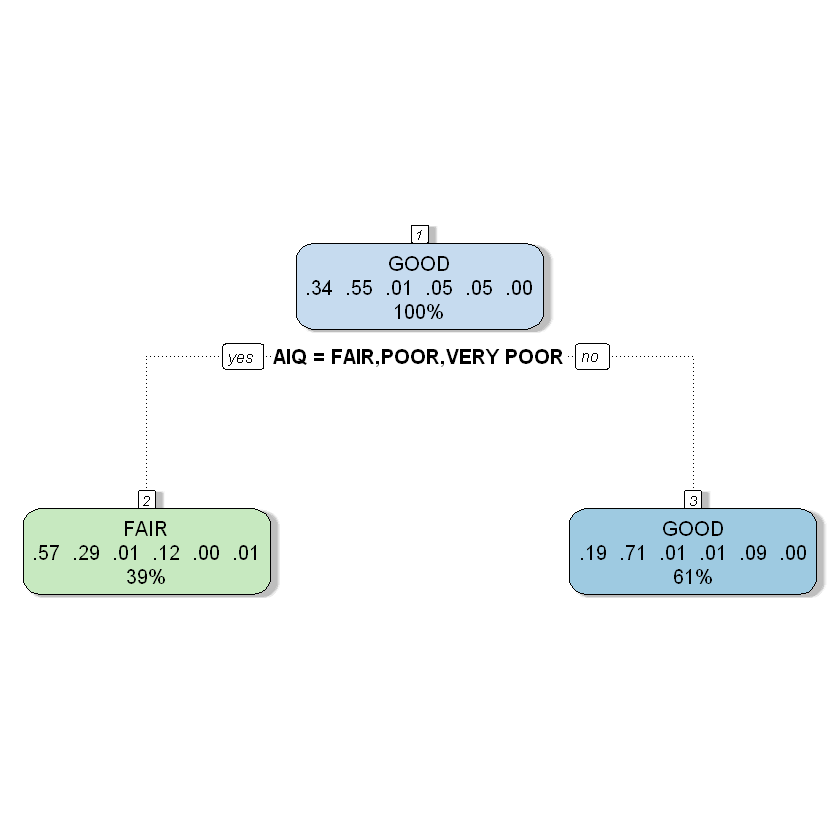

In [199]:
fancyRpartPlot(madrid_rpart, caption = NULL)

#### Predicción con los datos de test

Se añadirá una nueva columna, en esta columna se encontrará el valor predicho por el árbol de decisión

In [200]:
testData$AIQExpected <- predict(madrid_rpart, newdata = testData, type = "class")
head(testData)

,date,station,CO,NO_2,O_3,PM10,SO_2,AQ,AIQ,AQNextDay,AIQNextDay,quantity,rainfallVolume,Speed,WindIndexQuality,AIQExpected
36098,2005-09-01,28079039,0.7016667,72.20583,35.91696,11.42000,7.513750,72.20583,FAIR,86.23957,FAIR,0.0,WEAK,1.1,LIGHT WIND,FAIR
36110,2005-09-02,28079039,0.6775000,76.58500,43.05773,86.23957,8.038750,86.23957,FAIR,60.24391,GOOD,0.0,WEAK,0.8,LIGHT WIND,FAIR
36142,2005-09-03,28079039,0.5225000,48.17250,60.24391,44.47045,6.763333,60.24391,GOOD,81.37125,FAIR,0.0,WEAK,1.7,LIGHT WIND,GOOD
36159,2005-09-04,28079039,0.9395833,81.37125,33.38217,31.92412,8.664167,81.37125,FAIR,48.32500,GOOD,0.0,WEAK,2.2,LIGHT WIND,FAIR
36188,2005-09-05,28079039,0.6212500,39.21750,42.94913,48.32500,6.352500,48.32500,GOOD,45.98130,GOOD,0.0,WEAK,3.3,LIGHT WIND,GOOD
36216,2005-09-06,28079039,0.5654167,31.01583,45.98130,35.21783,6.028750,45.98130,GOOD,44.74636,GOOD,2.5,MODERATE,3.1,LIGHT WIND,GOOD


In [201]:
predictTable<- table(testData$AIQExpected,testData$AIQNextDay)
predictTable

           
             FAIR  GOOD    NA  POOR VERY GOOD VERY POOR
  FAIR       6431  3544    69   577       123        10
  GOOD       3660 18814   522    64      7329        10
  NA            0     0     0     0         0         0
  POOR          0     0     0     0         0         0
  VERY GOOD     0     0     0     0         0         0
  VERY POOR     0     0     0     0         0         0

In [202]:
accuracy <- sum(diag(predictTable))/sum(predictTable)
accuracy

[1] 0.6134425

Observamos que obtenemos un nivel de confianza del 61 %, este es muy bajo por lo que se probará a utilizar otro modelo predictivo

In [203]:
rm(madrid_rpart)
rm(testData)
rm(trainData)
rm(predictTable)

### Árbol de decisiones version02

Inicializamos el gestor de memoria

In [204]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2141940,114.4,4075077,217.7,4075077,217.7
Vcells,11817041,90.2,143543840,1095.2,224287243,1711.2


In [205]:
# Establece una semilla fija para garantizar
# la reproducibilidad del ejemplo
head(version02)
tail(version02)
str(version02)
set.seed(1234)

date,CO,NO_2,O_3,PM10,SO_2,totalPollution,calidadAire,quantity,lluvia
ene. 2001,1.1599895,57.09584,19.48279,28.36042,25.03678,131.1358,BAJA,2.1387097,FUERTE
feb. 2001,1.2319305,64.67620,20.53339,34.69526,29.09892,150.2357,MUY BAJA,0.1214286,DEBIL
mar. 2001,0.8318802,49.26138,28.89632,23.20452,18.42624,120.6203,BAJA,2.0903226,FUERTE
abr. 2001,0.6788641,52.85142,40.29320,25.29923,15.15104,134.2738,BAJA,0.2034483,MODERADA
may. 2001,0.7728507,64.12986,41.05985,28.86099,14.71505,149.5386,MUY BAJA,2.0068966,FUERTE
jun. 2001,0.7225184,67.03988,45.59141,37.66015,15.09062,166.1046,MUY BAJA,0.1700000,DEBIL


,date,CO,NO_2,O_3,PM10,SO_2,totalPollution,calidadAire,quantity,lluvia
197,nov. 2017,0.2134110,62.46472,12.52191,10.191579,3.359910,88.75153,MEDIA,0.2966667,MODERADA
198,dic. 2017,0.1916438,53.39729,13.58503,7.984253,3.020341,78.17855,ALTA,0.6419355,MODERADA
199,feb. 2018,0.1625285,45.91508,20.71621,7.437788,2.586440,76.81804,ALTA,5.6785714,FUERTE
200,mar. 2018,0.1214441,29.51463,34.40214,4.351181,1.852738,70.24213,ALTA,11.9225806,FUERTE
201,abr. 2018,0.1180984,30.99135,34.43283,9.340042,1.903440,76.78576,ALTA,5.0866667,FUERTE
202,may. 2018,0.1041667,29.12500,32.87500,2.416667,1.875000,66.39583,ALTA,4.0838710,FUERTE


'data.frame':	202 obs. of  10 variables:
 $ date          : 'yearmon' num  ene. 2001 feb. 2001 mar. 2001 abr. 2001 ...
 $ CO            : num  1.16 1.232 0.832 0.679 0.773 ...
 $ NO_2          : num  57.1 64.7 49.3 52.9 64.1 ...
 $ O_3           : num  19.5 20.5 28.9 40.3 41.1 ...
 $ PM10          : num  28.4 34.7 23.2 25.3 28.9 ...
 $ SO_2          : num  25 29.1 18.4 15.2 14.7 ...
 $ totalPollution: num  131 150 121 134 150 ...
 $ calidadAire   : chr  "BAJA" "MUY BAJA" "BAJA" "BAJA" ...
 $ quantity      : num  2.139 0.121 2.09 0.203 2.007 ...
 $ lluvia        : chr  "FUERTE" "DEBIL" "FUERTE" "MODERADA" ...


In [206]:
separate <- as.integer(nrow(version02)*0.7)
trainData <- version02[1:separate,]
testData <- version02[separate:nrow(version02),]
head(trainData)
head(testData)

date,CO,NO_2,O_3,PM10,SO_2,totalPollution,calidadAire,quantity,lluvia
ene. 2001,1.1599895,57.09584,19.48279,28.36042,25.03678,131.1358,BAJA,2.1387097,FUERTE
feb. 2001,1.2319305,64.67620,20.53339,34.69526,29.09892,150.2357,MUY BAJA,0.1214286,DEBIL
mar. 2001,0.8318802,49.26138,28.89632,23.20452,18.42624,120.6203,BAJA,2.0903226,FUERTE
abr. 2001,0.6788641,52.85142,40.29320,25.29923,15.15104,134.2738,BAJA,0.2034483,MODERADA
may. 2001,0.7728507,64.12986,41.05985,28.86099,14.71505,149.5386,MUY BAJA,2.0068966,FUERTE
jun. 2001,0.7225184,67.03988,45.59141,37.66015,15.09062,166.1046,MUY BAJA,0.1700000,DEBIL


,date,CO,NO_2,O_3,PM10,SO_2,totalPollution,calidadAire,quantity,lluvia
141,mar. 2013,0.12770551,28.54309,28.18160,5.893942,1.661553,64.40788,ALTA,2.45862069,FUERTE
142,abr. 2013,0.11978010,26.61689,34.32413,8.277799,1.434130,70.77274,ALTA,2.07692308,FUERTE
143,may. 2013,0.10966471,25.68011,37.88080,7.085345,1.211944,71.96786,ALTA,0.65357143,MODERADA
144,jun. 2013,0.09731844,23.93293,43.05476,10.880020,1.200282,79.16531,ALTA,0.00000000,DEBIL
145,jul. 2013,0.10185481,28.78661,48.41675,15.082626,1.335035,93.72288,MEDIA,0.29354839,MODERADA
146,ago. 2013,0.09594107,25.51546,43.15497,14.183386,1.395372,84.34513,MEDIA,0.03225806,DEBIL


In [207]:
myFormula <- myFormula <- calidadAire ~ lluvia
madrid_rpart <- rpart(myFormula,data=trainData, control = rpart.control(minsplit = 10))

#### Comprobación de los datos de entrenamiento

In [208]:
attributes(madrid_rpart)

$names
 [1] "frame"               "where"               "call"               
 [4] "terms"               "cptable"             "method"             
 [7] "parms"               "control"             "functions"          
[10] "numresp"             "splits"              "csplit"             
[13] "variable.importance" "y"                   "ordered"            

$xlevels
$xlevels$lluvia
[1] "DEBIL"    "FUERTE"   "MODERADA"


$ylevels
[1] "ALTA"     "BAJA"     "MEDIA"    "MUY BAJA"

$class
[1] "rpart"

In [209]:
summary(madrid_rpart)

Call:
rpart(formula = myFormula, data = trainData, control = rpart.control(minsplit = 10))
  n= 141 

         CP nsplit rel error   xerror       xstd
1 0.1011236      0 1.0000000 1.179775 0.05817633
2 0.0100000      1 0.8988764 0.988764 0.06462190

Variable importance
lluvia 
   100 

Node number 1: 141 observations,    complexity param=0.1011236
  predicted class=BAJA      expected loss=0.6312057  P(node) =1
    class counts:    14    52    26    49
   probabilities: 0.099 0.369 0.184 0.348 
  left son=2 (36 obs) right son=3 (105 obs)
  Primary splits:
      lluvia splits as  RLR, improve=2.489294, (0 missing)

Node number 2: 36 observations
  predicted class=BAJA      expected loss=0.5  P(node) =0.2553191
    class counts:     4    18     8     6
   probabilities: 0.111 0.500 0.222 0.167 

Node number 3: 105 observations
  predicted class=MUY BAJA  expected loss=0.5904762  P(node) =0.7446809
    class counts:    10    34    18    43
   probabilities: 0.095 0.324 0.171 0.410 



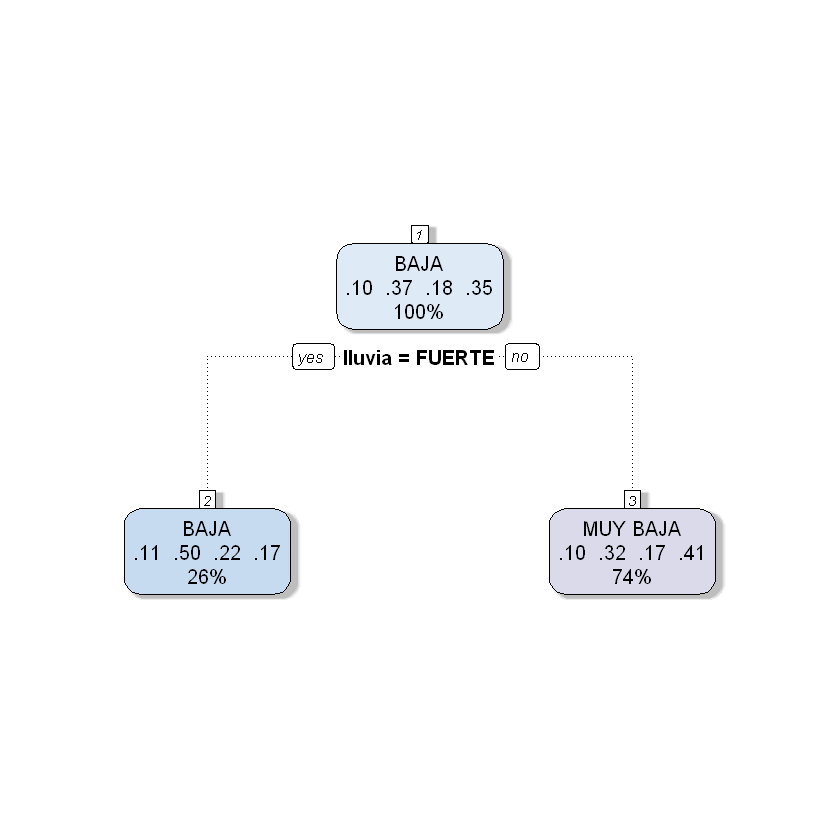

In [210]:
fancyRpartPlot(madrid_rpart, caption = NULL)

#### Predicción con los datos de test

Se añadirá una nueva columna, en esta columna se encontrará el valor predicho por el árbol de decisión

In [211]:
testData$AIQExpected <- predict(madrid_rpart, newdata = testData, type = "class")
head(testData)

,date,CO,NO_2,O_3,PM10,SO_2,totalPollution,calidadAire,quantity,lluvia,AIQExpected
141,mar. 2013,0.12770551,28.54309,28.18160,5.893942,1.661553,64.40788,ALTA,2.45862069,FUERTE,BAJA
142,abr. 2013,0.11978010,26.61689,34.32413,8.277799,1.434130,70.77274,ALTA,2.07692308,FUERTE,BAJA
143,may. 2013,0.10966471,25.68011,37.88080,7.085345,1.211944,71.96786,ALTA,0.65357143,MODERADA,MUY BAJA
144,jun. 2013,0.09731844,23.93293,43.05476,10.880020,1.200282,79.16531,ALTA,0.00000000,DEBIL,MUY BAJA
145,jul. 2013,0.10185481,28.78661,48.41675,15.082626,1.335035,93.72288,MEDIA,0.29354839,MODERADA,MUY BAJA
146,ago. 2013,0.09594107,25.51546,43.15497,14.183386,1.395372,84.34513,MEDIA,0.03225806,DEBIL,MUY BAJA


In [212]:
predictTable<- table(testData$calidadAire,testData$AIQExpected)
predictTable

       
        ALTA BAJA MEDIA MUY BAJA
  ALTA     0   14     0       25
  MEDIA    0    1     0       22

In [213]:
accuracy <- sum(diag(predictTable))/sum(predictTable)
accuracy

[1] 0.01612903

In [214]:
rm(madrid_rpart)
rm(testData)
rm(trainData)
rm(predictTable)

### Árbol de decisiones version03

Inicializamos el gestor de memoria

In [215]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2141934,114.4,4075077,217.7,4075077,217.7
Vcells,11817041,90.2,114835072,876.2,224287243,1711.2


In [216]:
# Establece una semilla fija para garantizar
# la reproducibilidad del ejemplo

head(version03)
tail(version03)
str(version03)
set.seed(1234)

,date,station,CO,NO_2,O_3,PM10,SO_2,AQ,AQNextDay,AIQ,AIQNextDay,quantity,rainfallVolume,Speed,WindIndexQuality
35,2001-01-02,28079001,1.243333,84.53750,12.576667,36.92455,20.28083,84.53750,79.75125,BAD,BAD,0.1,HIGH,3.6,HIGH
63,2001-01-03,28079001,1.242917,79.75125,10.961250,37.21292,16.23917,79.75125,75.39250,BAD,BAD,2.2,HIGH,1.7,MEDIUM
95,2001-01-04,28079001,1.134167,75.39250,12.002917,35.03667,16.75125,75.39250,77.14083,BAD,BAD,2.4,HIGH,3.3,HIGH
106,2001-01-05,28079001,1.535833,77.14083,8.755833,34.27625,16.00958,77.14083,64.47708,BAD,MEDIUM,13.3,HIGH,1.1,MEDIUM
126,2001-01-06,28079001,1.009167,64.47708,13.955417,17.03792,15.35417,64.47708,67.06125,MEDIUM,MEDIUM,0.0,LOW,2.5,HIGH
162,2001-01-07,28079001,1.016250,67.06125,12.776250,20.45500,18.43042,67.06125,92.57000,MEDIUM,BAD,0.0,LOW,2.2,MEDIUM


,date,station,CO,NO_2,O_3,PM10,SO_2,AQ,AQNextDay,AIQ,AIQNextDay,quantity,rainfallVolume,Speed,WindIndexQuality
137042,2018-04-26,28079060,0,29.041667,77.25000,42.54167,0,77.25000,81.83333,BAD,BAD,0.0,LOW,1.4,MEDIUM
137065,2018-04-27,28079060,0,20.958333,81.83333,29.57143,0,81.83333,87.20833,BAD,BAD,0.0,LOW,3.1,HIGH
137084,2018-04-28,28079060,0,8.375000,87.20833,10.33333,0,87.20833,93.08333,BAD,BAD,0.0,LOW,2.5,HIGH
137123,2018-04-29,28079060,0,6.958333,93.08333,14.45833,0,93.08333,83.33333,BAD,BAD,13.0,HIGH,4.2,HIGH
137147,2018-04-30,28079060,0,13.708333,83.33333,12.91667,0,83.33333,81.00000,BAD,BAD,4.8,HIGH,1.9,MEDIUM
137174,2018-05-01,28079060,0,14.000000,81.00000,6.00000,0,81.00000,NA,BAD,NA,0.2,HIGH,1.7,MEDIUM


'data.frame':	137174 obs. of  15 variables:
 $ date            : Date, format: "2001-01-02" "2001-01-03" ...
 $ station         : int  28079001 28079001 28079001 28079001 28079001 28079001 28079001 28079001 28079001 28079001 ...
 $ CO              : num  1.24 1.24 1.13 1.54 1.01 ...
 $ NO_2            : num  84.5 79.8 75.4 77.1 64.5 ...
 $ O_3             : num  12.58 10.96 12 8.76 13.96 ...
 $ PM10            : num  36.9 37.2 35 34.3 17 ...
 $ SO_2            : num  20.3 16.2 16.8 16 15.4 ...
 $ AQ              : num  84.5 79.8 75.4 77.1 64.5 ...
 $ AQNextDay       : num  79.8 75.4 77.1 64.5 67.1 ...
 $ AIQ             : chr  "BAD" "BAD" "BAD" "BAD" ...
 $ AIQNextDay      : chr  "BAD" "BAD" "BAD" "MEDIUM" ...
 $ quantity        : num  0.1 2.2 2.4 13.3 0 0 0 1.5 9.8 14.8 ...
 $ rainfallVolume  : chr  "HIGH" "HIGH" "HIGH" "HIGH" ...
 $ Speed           : num  3.6 1.7 3.3 1.1 2.5 2.2 0.3 0.6 0.3 1.7 ...
 $ WindIndexQuality: chr  "HIGH" "MEDIUM" "HIGH" "MEDIUM" ...


In [217]:
separate <- as.integer(nrow(version03)*0.7)
trainData <- version03[1:separate,]
testData <- version03[separate:nrow(version03),]
head(trainData)
head(testData)

,date,station,CO,NO_2,O_3,PM10,SO_2,AQ,AQNextDay,AIQ,AIQNextDay,quantity,rainfallVolume,Speed,WindIndexQuality
35,2001-01-02,28079001,1.243333,84.53750,12.576667,36.92455,20.28083,84.53750,79.75125,BAD,BAD,0.1,HIGH,3.6,HIGH
63,2001-01-03,28079001,1.242917,79.75125,10.961250,37.21292,16.23917,79.75125,75.39250,BAD,BAD,2.2,HIGH,1.7,MEDIUM
95,2001-01-04,28079001,1.134167,75.39250,12.002917,35.03667,16.75125,75.39250,77.14083,BAD,BAD,2.4,HIGH,3.3,HIGH
106,2001-01-05,28079001,1.535833,77.14083,8.755833,34.27625,16.00958,77.14083,64.47708,BAD,MEDIUM,13.3,HIGH,1.1,MEDIUM
126,2001-01-06,28079001,1.009167,64.47708,13.955417,17.03792,15.35417,64.47708,67.06125,MEDIUM,MEDIUM,0.0,LOW,2.5,HIGH
162,2001-01-07,28079001,1.016250,67.06125,12.776250,20.45500,18.43042,67.06125,92.57000,MEDIUM,BAD,0.0,LOW,2.2,MEDIUM


,date,station,CO,NO_2,O_3,PM10,SO_2,AQ,AQNextDay,AIQ,AIQNextDay,quantity,rainfallVolume,Speed,WindIndexQuality
36098,2005-09-01,28079039,0.7016667,72.20583,35.91696,11.42000,7.513750,72.20583,86.23957,MEDIUM,BAD,0.0,LOW,1.1,MEDIUM
36110,2005-09-02,28079039,0.6775000,76.58500,43.05773,86.23957,8.038750,86.23957,60.24391,BAD,MEDIUM,0.0,LOW,0.8,MEDIUM
36142,2005-09-03,28079039,0.5225000,48.17250,60.24391,44.47045,6.763333,60.24391,81.37125,MEDIUM,BAD,0.0,LOW,1.7,MEDIUM
36159,2005-09-04,28079039,0.9395833,81.37125,33.38217,31.92412,8.664167,81.37125,48.32500,BAD,MEDIUM,0.0,LOW,2.2,MEDIUM
36188,2005-09-05,28079039,0.6212500,39.21750,42.94913,48.32500,6.352500,48.32500,45.98130,MEDIUM,GOOD,0.0,LOW,3.3,HIGH
36216,2005-09-06,28079039,0.5654167,31.01583,45.98130,35.21783,6.028750,45.98130,44.74636,GOOD,GOOD,2.5,HIGH,3.1,HIGH


In [218]:
myFormula <- AIQNextDay ~ AIQ + rainfallVolume + WindIndexQuality

In [219]:
madrid_rpart <- rpart(myFormula,data=trainData, control = rpart.control(minsplit = 10))

#### Comprobación de los datos de entrenamiento

In [220]:
attributes(madrid_rpart)

$names
 [1] "frame"               "where"               "call"               
 [4] "terms"               "cptable"             "method"             
 [7] "parms"               "control"             "functions"          
[10] "numresp"             "splits"              "csplit"             
[13] "variable.importance" "y"                   "ordered"            

$xlevels
$xlevels$AIQ
[1] "BAD"    "GOOD"   "MEDIUM"

$xlevels$rainfallVolume
[1] "HIGH" "LOW" 

$xlevels$WindIndexQuality
[1] "HIGH"   "LOW"    "MEDIUM"


$ylevels
[1] "BAD"    "GOOD"   "MEDIUM"

$class
[1] "rpart"

In [221]:
summary(madrid_rpart)

Call:
rpart(formula = myFormula, data = trainData, control = rpart.control(minsplit = 10))
  n= 96021 

         CP nsplit rel error    xerror        xstd
1 0.1860097      0 1.0000000 1.0000000 0.003355971
2 0.1008844      1 0.8139903 0.8139903 0.003277871
3 0.0100000      2 0.7131059 0.7131059 0.003187792

Variable importance
AIQ 
100 

Node number 1: 96021 observations,    complexity param=0.1860097
  predicted class=MEDIUM  expected loss=0.4804366  P(node) =1
    class counts: 26508 19624 49889
   probabilities: 0.276 0.204 0.520 
  left son=2 (26593 obs) right son=3 (69428 obs)
  Primary splits:
      AIQ              splits as  LRR, improve=7742.668, (0 missing)
      rainfallVolume   splits as  RL,  improve= 770.883, (0 missing)
      WindIndexQuality splits as  RLL, improve= 502.584, (0 missing)

Node number 2: 26593 observations
  predicted class=BAD     expected loss=0.3493401  P(node) =0.2769498
    class counts: 17303   568  8722
   probabilities: 0.651 0.021 0.328 

Node nu

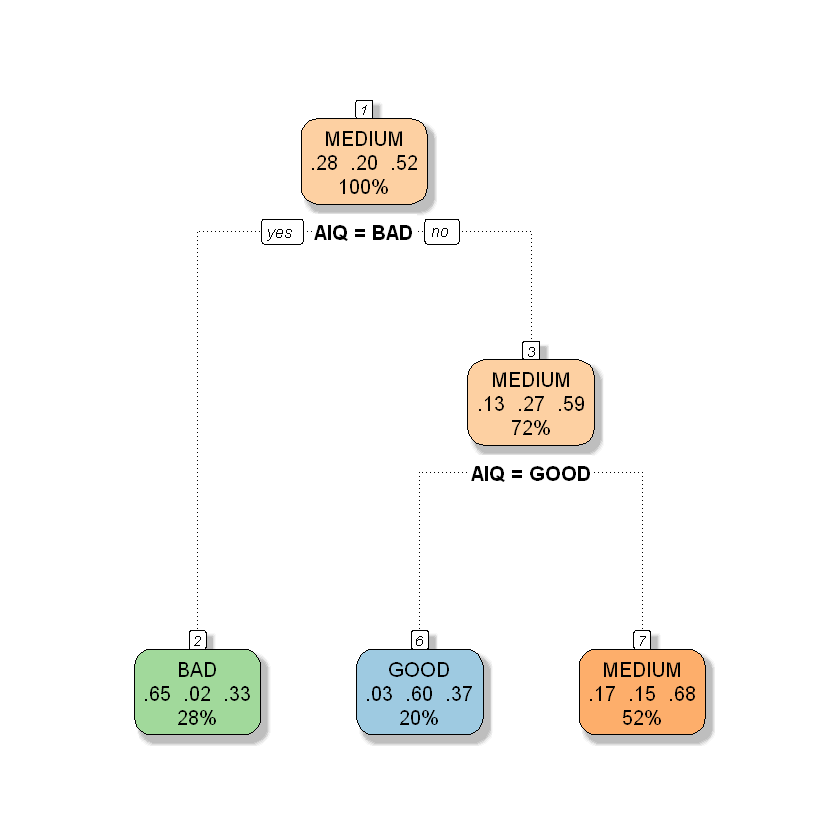

In [222]:
fancyRpartPlot(madrid_rpart, caption = NULL)

Cada caja de nodo muestra la clasificación, la probabilidad de cada clase en ese nodo (es decir, la probabilidad de la clase condicionada en el nodo) y el porcentaje de observaciones utilizadas en ese nodo. 

#### Predicción con los datos de test

Se añadirá una nueva columna, en esta columna se encontrará el valor predicho por el árbol de decisión

In [223]:
testData$AIQExpected <- predict(madrid_rpart, newdata = testData, type = "class")
head(testData)

,date,station,CO,NO_2,O_3,PM10,SO_2,AQ,AQNextDay,AIQ,AIQNextDay,quantity,rainfallVolume,Speed,WindIndexQuality,AIQExpected
36098,2005-09-01,28079039,0.7016667,72.20583,35.91696,11.42000,7.513750,72.20583,86.23957,MEDIUM,BAD,0.0,LOW,1.1,MEDIUM,MEDIUM
36110,2005-09-02,28079039,0.6775000,76.58500,43.05773,86.23957,8.038750,86.23957,60.24391,BAD,MEDIUM,0.0,LOW,0.8,MEDIUM,BAD
36142,2005-09-03,28079039,0.5225000,48.17250,60.24391,44.47045,6.763333,60.24391,81.37125,MEDIUM,BAD,0.0,LOW,1.7,MEDIUM,MEDIUM
36159,2005-09-04,28079039,0.9395833,81.37125,33.38217,31.92412,8.664167,81.37125,48.32500,BAD,MEDIUM,0.0,LOW,2.2,MEDIUM,BAD
36188,2005-09-05,28079039,0.6212500,39.21750,42.94913,48.32500,6.352500,48.32500,45.98130,MEDIUM,GOOD,0.0,LOW,3.3,HIGH,MEDIUM
36216,2005-09-06,28079039,0.5654167,31.01583,45.98130,35.21783,6.028750,45.98130,44.74636,GOOD,GOOD,2.5,HIGH,3.1,HIGH,GOOD


In [224]:
predictTable<- table(testData$AIQNextDay,testData$AIQExpected)
predictTable

        
           BAD  GOOD MEDIUM
  BAD     4266   282   2570
  GOOD     242 11896   3937
  MEDIUM  2588  3868  11504
  NA         1     0      0

In [225]:
accuracy <- sum(diag(predictTable))/sum(predictTable)
accuracy

[1] 0.6722554

Liberamos memoria

In [226]:
rm (list=ls())

## 5º FASE: ASSESS (Resultados y Evaluaciones)

Se evalúan los resultados del proceso de minería de datos, midiendo su utilidad y fiabilidad para cada uno de los modelos, se aplicará una **validación simple**.
- Modelo aplicado para version01
- Modelo aplciado para version02
- Modelo aplicado para version03

### Conclusiones sobre version01

<p style="text-align: justify;">
Observamos que para el dataframe que contiene las variables categoricas según las fuentes expuestas anteriormente tiene una precisión de 61%, por lo que no es significativo.
</p>

### Conclusiones sobre dataversion02

<p style="text-align: justify;">
Observamos que para el dataframe que contiene las variables categoricas según las fuentes expuestas anteriormente tiene una precisión que no llega al 2% por tanto hemos podido comprabar que relizar el estudio por meses no ha sido una buena opción.
</p>

### Conclusiones sobre dataversion03

<p style="text-align: justify;">
Observamos que para el dataframe que contiene las variables categoricas según las fuentes expuestas anteriormente tiene una precisión casio del 70%, por lo que nos permite comprobar que obteniendo variables categoricas basadas solamente en los cuarilescomo corte, podemos probar que las precipitaciones tienen influencia directa en la contaminación.
</p>

## 6. Conclusiones

<p style="text-align: justify;">
Tras el estudio realizado sobre el impacto de las precipitaciones y la velocidad del viento en la ciudad de Madrid, se ha podido comprobar que la lluvia afecta de manera significativa a la contaminación al día siguiente, produciendo un descenso de la misma. 
</p>
<p style="text-align: justify;">
El objetivo es ampliar el estudio aplicando nuevos modelos, por ejemplo, reglas de asociación estableciendo el consecuente en la contaminación del dia al siguiente y obtener los antecedetnes que lo provocan e  incluir nuevas ventanas temporales como estudiar el impacto a los dos días, a la semanas...
</p>

## 7. Bibliografía

Además de todos los apuntes de la propia asignatura, a continuación se adjuntan las Fuentes utilizadas para la realización del proyecto:

[Datos precipitaciones AEMET](https://datosclima.es/Aemet2013/Precipitacion2013.php)  
[Datos viento AEMET](https://datosclima.es/Aemet2013/Viento2013.php)  
[Página para consultar dudas durante realización del proyecto](https://stackoverflow.com/)  
[Discretización de la contaminación](https://www.epa.vic.gov.au/your-environment/air/air-pollution/air-quality-index/calculating-a-station-air-quality-index)  
[Discretización de la lluvia](http://apuntesdearquitecturadigital.blogspot.com/2017/05/analisis-climatico-precipitaciones.html)  
[Discretización de la velocidad del viento](https://es.wikipedia.org/wiki/Escala_de_Beaufort)  
[Utilización de árboles de decisión con r-part](https://www.gormanalysis.com/blog/decision-trees-in-r-using-rpart/)  
[Utilización fancyRpartPlot -Dibujar árbol de decisión-](https://www.rdocumentation.org/packages/rattle/versions/5.2.0/topics/fancyRpartPlot)  
[Utilización modelos generalizados de regresión](https://www.theanalysisfactor.com/generalized-linear-models-glm-r-part4/)  
[Artículo sobre la relación de las precipitaciones y el descenso de la contaminación](https://www.sciencedirect.com/science/article/pii/S2352146517305951)  
